In [1]:
%matplotlib notebook

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tools.database_tools as dbt
import calculate_phase.solar_apparitions as sa
from importlib import reload  

In [4]:
reload(sa)

<module 'calculate_phase.solar_apparitions' from '/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/calculate_phase/solar_apparitions.py'>

In [5]:
# sol_elong_diff = -1.0
sol_elong_diff = -2.0
N_samp = int(2e3)
fname_results = "/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_atlas_objects_uniform_sample_results.csv"

In [6]:
data_load_path="/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs"
eph_load_path="/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files"

In [7]:
# sample full distribution
fpath = "/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/fit_db_analysis"
fname = "atlas_phase_fits_orbs_2_7_2021.csv"
sample_file = "/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_atlas_objects_uniform_sample.csv"

df=dbt.load_atlas_phase_fits_orbs("{}/{}".format(fpath,fname))
# select only inner solar system
J_aphelion=5.46 # Jupiter aphelion
mask=(df["a_semimajor_axis"]>J_aphelion)
df = df[~mask]

In [8]:
df["q_perihelion"] = df["a_semimajor_axis"]*(1.0-df["e_eccentricity"])

In [9]:
df

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_OC_std_B89_c,phase_curve_OC_std_B89_o,phase_curve_OC_std_P16_c,phase_curve_OC_std_P16_o,mpc_number.1,name.1,a_semimajor_axis,e_eccentricity,i_inclination_deg,q_perihelion
0,2018-06-01 12:18:01,31.0,13.0,18.0,59242.220336,2021-01-15 04:02:43,2021-01-30 02:22:48,1.0,Ceres,1.0,...,0.174245,0.155100,0.177920,0.151089,1.0,Ceres,2.765655,0.078394,10.588194,2.548844
1,NaN,24.0,3.0,20.0,59160.239745,2020-05-24 07:16:19,2020-11-09 13:23:01,2.0,Pallas,2.0,...,NaN,NaN,NaN,NaN,2.0,Pallas,2.773779,0.229762,34.898656,2.136469
2,NaN,45.0,20.0,25.0,59300.540000,2021-06-10 03:45:40,2021-06-12 21:05:18,3.0,Juno,3.0,...,0.082961,0.174667,0.081671,0.174817,3.0,Juno,2.668151,0.256965,12.991481,1.982530
3,NaN,12.0,7.0,5.0,59233.510382,2021-01-25 00:07:31,2020-03-17 23:04:16,4.0,Vesta,4.0,...,NaN,NaN,NaN,NaN,4.0,Vesta,2.361650,0.088349,7.141542,2.153000
4,2020-10-20 15:12:33,193.0,49.0,141.0,59349.566586,2021-06-16 22:09:32,2021-06-15 21:02:16,5.0,Astraea,5.0,...,0.095036,0.093920,0.094819,0.093835,5.0,Astraea,2.573926,0.190614,5.367599,2.083299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434034,NaN,10.0,7.0,3.0,59277.428275,2021-06-10 09:40:14,2021-06-11 09:39:22,506906.0,2008 CK194,553711.0,...,NaN,NaN,0.114588,0.023317,506906.0,2008 CK194,1.895502,0.061007,19.145688,1.779864
434035,NaN,15.0,12.0,3.0,59267.395093,2021-06-10 12:11:55,2021-06-10 20:44:26,549516.0,2011 KP48,603135.0,...,0.096242,NaN,0.094321,0.040713,549516.0,2011 KP48,3.132320,0.111520,9.487708,2.783004
434036,NaN,18.0,14.0,4.0,59352.314387,2021-06-17 01:11:09,2021-06-17 06:21:32,550221.0,2012 CK5,613285.0,...,NaN,0.216665,0.144186,0.216665,550221.0,2012 CK5,2.699094,0.290774,13.435808,1.914269
434037,NaN,18.0,13.0,5.0,59257.465220,2021-06-10 00:23:51,2021-02-03 07:14:23,551041.0,2012 VB7,624230.0,...,NaN,NaN,0.074179,0.000295,551041.0,2012 VB7,1.872771,0.067888,17.850431,1.745633


In [10]:
df[df["q_perihelion"]<1.3]

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_OC_std_B89_c,phase_curve_OC_std_B89_o,phase_curve_OC_std_P16_c,phase_curve_OC_std_P16_o,mpc_number.1,name.1,a_semimajor_axis,e_eccentricity,i_inclination_deg,q_perihelion
432,2020-10-20 15:12:33,408.0,188.0,219.0,59379.440544,2021-06-19 19:17:57,2021-06-17 16:46:09,433.0,Eros,433.0,...,0.121273,0.106151,0.122842,0.109158,433.0,Eros,1.458130,0.222910,10.830498,1.133099
718,2020-10-20 15:12:33,468.0,128.0,339.0,58540.240903,2019-06-25 04:15:28,2019-06-26 00:37:16,719.0,Albert,719.0,...,0.380120,0.392559,0.378600,0.389566,719.0,Albert,2.638022,0.546870,11.573315,1.195366
886,2020-10-20 15:12:33,804.0,292.0,512.0,59383.280961,2021-06-19 17:42:55,2021-06-20 06:48:10,887.0,Alinda,887.0,...,0.143974,0.200968,0.145626,0.202675,887.0,Alinda,2.473657,0.570458,9.393749,1.062539
1035,2020-10-20 15:19:07,1215.0,277.0,932.0,59354.262917,2021-06-15 23:05:54,2021-06-17 13:22:46,1036.0,Ganymed,1036.0,...,0.047656,0.061826,0.048174,0.063348,1036.0,Ganymed,2.665553,0.533130,26.675674,1.244467
1577,2020-10-20 15:19:07,488.0,130.0,358.0,59269.221030,2021-06-10 03:43:24,2021-06-10 23:34:08,1580.0,Betulia,1580.0,...,0.180709,0.174361,0.180976,0.174361,1580.0,Betulia,2.197424,0.487187,52.079094,1.126868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433955,NaN,48.0,32.0,16.0,59231.292060,2021-01-19 06:06:48,2021-01-04 10:01:08,NaN,2017 BQ93,707193.0,...,NaN,NaN,NaN,NaN,NaN,2017 BQ93,1.570374,0.422636,38.650741,0.906677
434002,NaN,2.0,1.0,1.0,59231.443704,2021-01-19 06:03:43,NaN,NaN,2017 OR68,714586.0,...,NaN,NaN,NaN,NaN,NaN,2017 OR68,1.266718,0.164866,24.529337,1.057880
434005,NaN,1.0,0.0,1.0,59158.333785,NaN,2020-11-07 03:40:12,NaN,2017 RZ17,715543.0,...,NaN,NaN,NaN,NaN,NaN,2017 RZ17,2.035347,0.505418,9.888439,1.006647
434024,NaN,20.0,9.0,11.0,59354.259086,2021-06-16 21:08:02,2021-06-17 12:40:50,414429.0,2009 DC43,414429.0,...,0.146799,0.138809,0.146847,0.138802,414429.0,2009 DC43,1.800302,0.489655,20.841680,0.918775


In [11]:
df[np.isnan(df["detection_count"])]

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_OC_std_B89_c,phase_curve_OC_std_B89_o,phase_curve_OC_std_P16_c,phase_curve_OC_std_P16_o,mpc_number.1,name.1,a_semimajor_axis,e_eccentricity,i_inclination_deg,q_perihelion


In [12]:
# Attempt to be more uniform and account for high density of MBAs
N_grid_x = 20
N_grid_y = 10
N_box = int(N_samp/(N_grid_x*N_grid_y))

X="a_semimajor_axis"
Y="e_eccentricity"
x = np.array(df[X])
y = np.array(df[Y])

grid_x = np.linspace(np.amin(x),np.amax(x),N_grid_x)
grid_y = np.linspace(np.amin(y),np.amax(y),N_grid_y)


# Load or generate a subsample of objects
if os.path.isfile(sample_file):
    print("load sample")
    df_samp = pd.read_csv(sample_file,index_col=0)
else:
    print("gen sample")

    # Simple random sample
#     df_samp = df.sample(N_samp)
#     df_samp.to_csv(sample_file)
#     print("save {}".format(sample_file))
    
    df_samp = pd.DataFrame()

    for i in range(1,N_grid_x):
        for j in range(1,N_grid_y):
            
            # select xy box
            _df = df[(df[X]>=grid_x[i-1]) & (df[X]<grid_x[i]) &
                    (df[Y]>=grid_y[j-1]) & (df[Y]<grid_y[j])]
            
            # sample from within the box
            if len(_df)<=N_box:
                df_samp = df_samp.append(_df)
            else:
                df_samp = df_samp.append(_df.sample(N_box))

    df_samp.to_csv(sample_file)

load sample


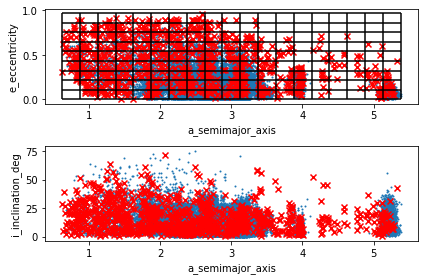

In [13]:
# plot orbital distribution
fig = plt.figure()
gs = gridspec.GridSpec(2, 1)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])

ax1.scatter(df["a_semimajor_axis"],df["e_eccentricity"],s=1)
ax2.scatter(df["a_semimajor_axis"],df["i_inclination_deg"],s=1)

ax1.scatter(df_samp["a_semimajor_axis"],df_samp["e_eccentricity"],c="r",marker="x")
ax2.scatter(df_samp["a_semimajor_axis"],df_samp["i_inclination_deg"],c="r",marker="x")

# q=1.3 # AU
# x_grid=np.linspace(q,np.amax(df_samp["a_semimajor_axis"]))
# ax1.plot(x_grid,1.0-(q/x_grid),color="k")

ax1.set_xlabel("a_semimajor_axis")
ax1.set_ylabel("e_eccentricity")

ax2.set_xlabel("a_semimajor_axis")
ax2.set_ylabel("i_inclination_deg")

ax1.vlines(grid_x,np.amin(y),np.amax(y),color="k")
ax1.hlines(grid_y,np.amin(x),np.amax(x),color="k")

plt.tight_layout()
plt.show()

In [14]:
df_samp[["mpc_number","name"]]

,mpc_number,name
148761,152637.0,1997 NC1
158382,163899.0,2003 SD220
432249,NaN,2009 SZ99
317364,NaN,2006 XO4
375881,NaN,2013 KJ6
...,...,...
40088,40237.0,1998 VM6
387490,275137.0,2009 VP72
414931,NaN,2011 OP18
432475,NaN,2010 EZ163


In [15]:
# df_samp.iloc[0][["a_semimajor_axis","e_eccentricity","i_inclination_deg"]]

In [16]:
# see solar_apparitions_uniform_sample.py

result_list = []

for i in range(len(df_samp)):
    name = df_samp.iloc[i]["name"]
    mpc_number = df_samp.iloc[i]["mpc_number"]
    
    fname = "{}/df_data_{}.csv".format(data_load_path,"_".join(name.split(" ")))
    print(fname)
    
    # only process objects we have already downloaded
    if not os.path.isfile(fname):
        print("not downloaded")
        continue
        
    sol = sa.solar_apparitions(name=name,data_load_path=data_load_path,eph_load_path=eph_load_path)
    tp1 = sol.solar_elongation_JPL(JPL_step="7d")
    tp2 = sol.solar_elongation(sol_elong_diff)
    
    if len(tp1)==0:
        N_app_JPL = np.nan
    else:
        N_app_JPL = len(tp1)-1
    N_app_diff = len(tp2)-1
    
    orb=list(df_samp.iloc[i][["a_semimajor_axis","e_eccentricity","i_inclination_deg","detection_count"]])    
    results = [mpc_number,name,N_app_diff,N_app_JPL]+orb
    print(results)
    
    result_list.append(results)

#     break
    
# Save the results to csv!
# ALSO RECORD DETECTION COUNT!

/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1997_NC1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1997_NC1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1997_NC1.csv
load data
19.833129113247736
0.21
load Horizons
[57901.2701733  57926.3034814  57936.3066961  57946.2770051
 58266.5699533  58470.66042965 59369.253738  ]
[152637.0, '1997 NC1', 6, 4, 0.86506595, 0.20821328, 16.72488, 51.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_SD220.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_SD220.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2003_SD220.csv
load data
19.135188392861014
0.048
load Horizons
[58095.2015843  58112.2328163  58414.63633855 58790.63566
 58790.643519  ]
[163899.0, '2003 SD220', 4, 3, 0.82669411, 0.21063135, 8.514

[57557.609431   58233.63191755 58951.6275     58997.586748
 59396.270093  ]
[308242.0, '2005 GO21', 4, 6, 0.75322149, 0.3399339, 24.927562, 28.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_TL4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_TL4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2003_TL4.csv
load data
21.63304457172806
0.129
load Horizons
[57640.6167202  58344.2818159  58368.33732545 58372.33865135
 58382.31427795 58434.30377665]
[413260.0, '2003 TL4', 5, 2, 0.77670714, 0.38142191, 12.187362, 79.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_DB4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_DB4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_DB4.csv
load data
18.21415891763906
0.12
load Horizons
[57840.244

query Horizons
dates equal, just use upper and lower mjds
[58183.58581685 58183.59777785]
[325102.0, '2008 EY5', 1, 1, 0.62621024, 0.6268005, 5.109142, 2.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_TC4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_TC4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2008_TC4.csv
load data
22.351370080952925
0.17
load Horizons
[58748.493009 58761.301655]
[nan, '2008 TC4', 1, 1, 0.78032472, 0.55449879, 10.641862, 21.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_LT7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_LT7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1999_LT7.csv
load data
20.493301995171457
0.0755
load Horizons
[57862.321638  57863.402025  57867.422813  57870.3705655 57880.260

[57847.4662298 58887.569954  59351.242199 ]
[394392.0, '2007 EP88', 2, 3, 0.83728625, 0.88590303, 20.747126, 29.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_CL7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_CL7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2005_CL7.csv
load data
21.05657968530567
0.117
load Horizons
[58504.55423065 58538.634294   58542.655509   58546.64537
 58550.632789   58867.408079   58873.413449   58875.441586
 58877.40441    58879.409433   58910.341157  ]
[525364.0, '2005 CL7', 10, 2, 1.04896125, 0.10052334, 31.282942, 105.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_RZ2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_RZ2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2005_RZ2.csv
load data
24.24

[59157.525544 59187.397118 59189.424109 59235.304132]
[nan, '2003 YJ', 3, 1, 0.93037332, 0.19863546, 19.470773, 100.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_XO56.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_XO56.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_XO56.csv
load data
21.38297331754774
0.23299999999999998
load Horizons
[58118.2725312  58123.29769785]
[510160.0, '2010 XO56', 1, 1, 1.11693116, 0.11171875, 40.575104, 4.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_GH135.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_GH135.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2016_GH135.csv
load data
23.04886747960759
0.183
load Horizons
[57481.294035 57490.325625 57846.620984 57858.553287 57860.541678
 57863.6

load Horizons
[58868.570312 58879.656366 58887.662662 59244.562072 59255.617234
 59271.643148 59271.652986]
[138971.0, '2001 CB21', 6, 2, 1.03431874, 0.33340405, 7.899315, 59.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_EM20.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_EM20.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2004_EM20.csv
load data
21.796010328297157
0.1785
load Horizons
[58183.49122665 58193.47035855 59180.282211   59180.290012  ]
[267940.0, '2004 EM20', 3, 2, 1.10545534, 0.52400279, 14.137767, 10.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2012_JG11.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2012_JG11.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2012_JG11.csv
load data
20.787060894066084
0.165
load Horizon

load Horizons
[57737.206933   58082.5934336  58473.55252485 58520.338981  ]
[152742.0, '1998 XE12', 3, 3, 0.87822656, 0.73909838, 13.433159, 145.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_EG.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_EG.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2008_EG.csv
load data
20.509583648592905
0.182
load Horizons
[58539.511644 58567.299769]
[457059.0, '2008 EG', 1, 1, 0.94286346, 0.73904714, 26.787337, 20.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2009_CB3.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2009_CB3.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2009_CB3.csv
load data
21.216247505445008
0.11399999999999999
load Horizons
[58912.648681 59288.325613 59303.358241]
[462550.0, '2009 CB

load Horizons
[57766.2259276  57774.2594524  57778.2924284  58063.6278415
 58469.61725325 58833.596308   58879.52287    58881.647373
 58885.593171   59190.63316    59257.243681  ]
[137924.0, '2000 BD19', 10, 6, 0.87647097, 0.89498169, 25.735908, 234.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_XM4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_XM4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2005_XM4.csv
load data
20.68065797392817
0.168
load Horizons
[58081.5888884 58118.6233476 59200.607847  59200.61838  ]
[417201.0, '2005 XM4', 3, 2, 1.30368594, 0.06407211, 34.145816, 33.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_FD7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_FD7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_ep

[57800.5674703 57804.5564557 57806.592049  57809.5412586 57811.650509
 58910.624086 ]
[nan, '2017 BM123', 5, 2, 1.31099429, 0.29653644, 7.865763, 34.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_CM20.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_CM20.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2008_CM20.csv
load data
23.28803261070024
0.184
load Horizons
[57761.5820467 57783.5377172 57787.5017736 57787.5578635]
[484462.0, '2008 CM20', 3, 1, 1.30578672, 0.22297232, 21.073824, 23.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_SR339.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_SR339.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2014_SR339.csv
load data
19.475394726115244
0.074
load Horizons
[57939.5352569  58153.32803

[58406.61327075 58454.45605705]
[154300.0, '2002 UO', 1, 1, 1.20927089, 0.4724944, 8.293416, 44.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_FH1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_FH1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2003_FH1.csv
load data
19.689169815535877
0.138
load Horizons
[57509.5270619 58688.615799  58692.556088  58700.570856  58708.616493
 58719.604826  59292.282465  59298.36647   59300.393044  59304.342222
 59310.326296  59353.27956  ]
[317643.0, '2003 FH1', 11, 4, 1.1839974, 0.43960253, 14.64048, 53.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1998_XS16.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1998_XS16.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1998_XS16.csv
load data
17.68431643344

[57697.5571131 58789.643495  58797.625579  58797.642847 ]
[378124.0, '2006 VT2', 3, 2, 1.26274749, 0.72293104, 31.813154, 28.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_WS67.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_WS67.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2000_WS67.csv
load data
19.547303961281855
0.1775
load Horizons
[58132.59616415 59226.509931   59246.521192   59250.601817
 59258.56228   ]
[225586.0, '2000 WS67', 4, 2, 1.29873344, 0.70727559, 20.64047, 64.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_XO29.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_XO29.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2004_XO29.csv
load data
21.80373443602708
0.258
query Horizons
dates equal, just use upper and low

[3200.0, 'Phaethon', 8, 6, 1.27134813, 0.88978935, 22.257121, 602.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_UD.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_UD.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2005_UD.csv
load data
18.543467859547604
0.183
load Horizons
[57698.4468598  58385.63861445 58788.629294   58802.644711  ]
[155140.0, '2005 UD', 3, 3, 1.27484889, 0.87224191, 28.659618, 74.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_UJ7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_UJ7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1999_UJ7.csv
load data
18.23449780980169
0.132
load Horizons
[57660.6045679  58432.63862485 59207.605012   59379.293738  ]
[121514.0, '1999 UJ7', 3, 3, 1.5244269, 0.03929373, 16.749

[57405.601505  57578.5121101]
[381181.0, '2007 LV19', 1, 2, 1.47164404, 0.32038586, 14.889035, 10.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_MN51.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_MN51.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_MN51.csv
load data
19.494028266355585
0.1555
load Horizons
[57601.5476169 58325.5487887 59017.56713   59097.477106 ]
[468730.0, '2010 MN51', 3, 3, 1.59564362, 0.24427276, 33.625911, 144.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2007_AS12.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2007_AS12.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2007_AS12.csv
load data
19.797580750156385
0.123
load Horizons
[57935.5003165 58832.568843  58893.404676 ]
[438452.0, '2007 AS12', 2, 2, 1.50

[57374.429178 57388.242095]
[nan, '2015 XD130', 1, 1, 1.48249087, 0.4634915, 32.974013, 2.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_TA1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_TA1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2008_TA1.csv
load data
19.461314203513314
0.174
load Horizons
[58407.51487525 58479.27024915]
[397847.0, '2008 TA1', 1, 1, 1.39650641, 0.44842312, 14.831092, 56.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_XK47.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_XK47.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2000_XK47.csv
load data
18.78426808174232
0.192
load Horizons
[58985.238785 59000.252164 59051.263113 59051.263113]
[26663.0, '2000 XK47', 3, 1, 1.54571068, 0.47207054, 13.536105, 6

[57388.298403  57819.5114195 58081.5610646 58543.540023  59291.565868
 59311.545394  59315.609097  59319.600775  59321.585729  59321.614653 ]
[381906.0, '2010 CL19', 9, 5, 1.54261895, 0.64577556, 7.313581, 207.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2009_CS5.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2009_CS5.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2009_CS5.csv
load data
19.93647138553891
0.247
load Horizons
[58167.51123585 58171.43058605]
[513472.0, '2009 CS5', 1, 1, 1.47458124, 0.65696816, 30.097872, 2.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_WK10.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_WK10.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2000_WK10.csv
load data
19.55041098251458
0.204
load Horizons
[

load Horizons
[58645.456493 58647.430046]
[nan, '2002 EW', 1, 1, 1.56321133, 0.78770407, 6.713696, 4.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_AJ129.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_AJ129.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_AJ129.csv
load data
19.710630393881093
0.079
load Horizons
[57460.6203456  57479.531855   58157.54786955 58185.39403135]
[276033.0, '2002 AJ129', 3, 2, 1.37046605, 0.91499753, 15.458201, 38.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_TC.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_TC.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_TC.csv
load data
19.906693961870477
0.231
load Horizons
[58081.4153208 58795.547176  58799.515509  58801.546655  58803.579468
 5880

[57386.450995 58019.495325 58718.589769 59405.548264 59413.533947]
[31221.0, '1998 BP26', 4, 4, 1.72339849, 0.2568914, 20.221512, 168.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_XM35.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_XM35.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2004_XM35.csv
load data
20.407071153885163
0.139
load Horizons
[58795.570891 58883.355463]
[409342.0, '2004 XM35', 1, 1, 1.83715503, 0.30095916, 5.358007, 98.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_DH8.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_DH8.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2000_DH8.csv
load data
19.940161812442263
0.181
load Horizons
[58876.524352 58932.582801 58942.599306]
[231792.0, '2000 DH8', 2, 1, 1.838152

[58814.495602 59083.317234 59083.326944]
[136795.0, '1997 BQ', 2, 2, 1.74657066, 0.47888028, 10.990581, 129.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2009_SK2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2009_SK2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2009_SK2.csv
load data
19.91573623732075
0.14
query Horizons
dates equal, just use upper and lower mjds
[58209.48573345 58209.51028575]
[515010.0, '2009 SK2', 1, 1, 1.71912905, 0.47167946, 38.229964, 5.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_AK.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_AK.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_AK.csv
load data
20.2344101450946
0.101
load Horizons
[58279.430833   58424.21705495 58428.20137065 58462.43180845
 58466

[58021.6351503 58027.6203993 58027.6315698]
[nan, '2012 TK123', 2, 1, 1.81506512, 0.68710961, 27.921347, 3.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_BR45.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_BR45.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2013_BR45.csv
load data
21.136334916858047
0.192
load Horizons
[57893.5338453 57926.3221765]
[nan, '2013 BR45', 1, 1, 1.81020743, 0.69043645, 4.629845, 33.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_UX4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_UX4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_UX4.csv
load data
20.106224387609025
0.138
load Horizons
[58762.415382 58817.215509]
[nan, '2001 UX4', 1, 1, 1.72097223, 0.75325757, 8.968234, 50.0]
/Users/jrobinson

[58612.590718 58618.580046 58624.602801 58629.571563 58631.589097
 58637.584074 59381.400289 59383.369803 59398.269769]
[89958.0, '2002 LY45', 8, 2, 1.64170369, 0.88626894, 9.908281, 33.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_LP6.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_LP6.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2003_LP6.csv
load data
17.640498783986004
0.152
load Horizons
[58634.438704 58721.263322]
[143637.0, '2003 LP6', 1, 1, 1.74624588, 0.88365822, 43.574995, 101.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2012_EY9.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2012_EY9.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2012_EY9.csv
load data
18.16223722222868
0.193
load Horizons
[58381.56171085 58930.544803 

[58769.456505 58867.374213]
[nan, '2016 QX1', 1, 1, 1.93184795, 0.22204757, 7.66653, 84.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2012_UJ153.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2012_UJ153.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2012_UJ153.csv
load data
19.207572628597326
0.1315
load Horizons
[57392.222072   58468.51727595 58600.334907  ]
[454075.0, '2012 UJ153', 2, 2, 2.02725289, 0.31046949, 5.543012, 146.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_ET56.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_ET56.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_ET56.csv
load data
16.88533714289549
0.114
load Horizons
[57978.6319303 59084.548403  59256.259861 ]
[nan, '2010 ET56', 2, 3, 2.09060354, 0.22412243, 26.4

19.19315517744579
0.093
load Horizons
[57630.4306752 57848.2733693 58719.489005  58888.292743  58902.281875
 58906.33316   58912.364352  58917.337049  58966.334803 ]
[492143.0, '2013 OE', 8, 4, 2.03309357, 0.50926368, 9.786846, 329.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2017_RK2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2017_RK2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2017_RK2.csv
load data
29.648927443466945
0.2145
load Horizons
[58011.4530263 58012.3817867 58013.4703503 58013.4703503]
[nan, '2017 RK2', 3, 1, 2.00903149, 0.50924957, 0.424955, 4.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_YS165.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_YS165.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2005_YS165.csv
lo

[nan, '2001 BX15', 1, 1, 1.92258688, 0.59284667, 12.155296, 8.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_AV60.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_AV60.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2013_AV60.csv
load data
19.75903334896821
0.0865
load Horizons
[57380.313681   57381.3214     57388.200556   58455.62908325
 58508.42374255]
[nan, '2013 AV60', 4, 2, 2.06402564, 0.73250451, 7.377451, 110.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_QL433.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_QL433.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2014_QL433.csv
load data
20.79457624048245
0.127
load Horizons
[59053.580891 59096.508009]
[nan, '2014 QL433', 1, 1, 2.09179386, 0.71770699, 4.427532, 53.0]
/User

load Horizons
[58870.592604 58900.528044 58910.417743 58920.39515 ]
[nan, '2009 AH16', 3, 1, 1.96881354, 0.75781686, 21.969331, 38.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_GO5.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_GO5.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_GO5.csv
load data
19.26040883872443
0.0865
load Horizons
[57952.6047424 57985.573252  57985.597488 ]
[434096.0, '2002 GO5', 2, 1, 1.89526031, 0.76777479, 13.769853, 40.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_OW3.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_OW3.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1999_OW3.csv
load data
15.519044515146504
0.127
load Horizons
[57703.6397391 57973.6275665 58730.632847  59021.586528  59188.30810

17.332822515071932
0.188
load Horizons
[57432.4667164  58402.49161845 58406.48778495]
[305851.0, '2009 EB6', 2, 2, 2.35404356, 0.14274128, 1.961198, 5.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_RV62.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_RV62.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_RV62.csv
load data
18.133655510191854
0.1575
load Horizons
[59163.590833 59219.44147 ]
[266074.0, '2006 RV62', 1, 1, 2.27092415, 0.22355984, 3.143066, 40.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_UA8.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_UA8.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2005_UA8.csv
load data
14.73521523027287
0.1025
query Horizons
dates equal, just use upper and lower mjds
[57737.4058643 5

15.500647081559762
0.1
load Horizons
[57464.5455488  57826.630324   58505.56488835 58947.557442
 59131.226551  ]
[6050.0, 'Miwablock', 4, 4, 2.2021384, 0.4369747, 6.404603, 573.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_SS.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_SS.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2004_SS.csv
load data
23.374052347909604
0.0595
load Horizons
[58007.325856  58011.327176  58013.340417  58015.3445932 58017.3588958
 58019.3646339 58022.3389422 58024.3577578 58026.369546  58035.4822182
 58056.4868273]
[nan, '2004 SS', 10, 2, 2.19736892, 0.52899754, 6.519549, 94.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_VY3.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_VY3.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_app

[57751.6372129 57755.6280111 59014.593322  59101.384606 ]
[497135.0, '2004 QD20', 3, 3, 2.17222864, 0.69762555, 17.539635, 112.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Zeus.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Zeus.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Zeus.csv
load data
15.316321450324956
0.135
load Horizons
[58743.619606 59053.409086]
[5731.0, 'Zeus', 1, 2, 2.26819529, 0.65316421, 11.313652, 49.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_SG1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_SG1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2016_SG1.csv
load data
18.260742661364237
0.199
load Horizons
[58779.500012 58918.617616 58957.592847]
[nan, '2016 SG1', 2, 2, 2.13421597, 0.69473062, 36.307986, 33.0]


/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2013_YK148.csv
load data
20.070205322863107
0.13
load Horizons
[57798.6456277 57817.3860302 57831.406458 ]
[nan, '2013 YK148', 2, 1, 2.14402032, 0.88474899, 17.576364, 47.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_NX44.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_NX44.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2005_NX44.csv
load data
19.049303060412402
0.127
load Horizons
[58361.2384684  58367.24791095 58371.26599195]
[438116.0, '2005 NX44', 2, 1, 2.21417566, 0.9076291, 36.642267, 10.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_XX58.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_XX58.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_

[58825.448519 58845.421609]
[nan, '2015 RX244', 1, 1, 2.41130066, 0.23237337, 6.112716, 19.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_YG5.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_YG5.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1999_YG5.csv
load data
17.08062972372791
0.104
load Horizons
[58459.65767225 58670.320868  ]
[257731.0, '1999 YG5', 1, 1, 2.40722392, 0.28222014, 12.728045, 294.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_VA13.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_VA13.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_VA13.csv
load data
16.321581910810984
0.114
load Horizons
[57652.5678538  58225.43085705 58637.548102   59093.586632
 59304.354537  ]
[189724.0, '2001 VA13', 4, 4, 2.41400739,

load Horizons
[57399.587882 58850.527951 59041.29272 ]
[468305.0, '2015 YA8', 2, 2, 2.59668761, 0.47237432, 15.819257, 246.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_KX4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_KX4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2000_KX4.csv
load data
15.445401264686712
0.1245
load Horizons
[58073.4938796 58105.4595257]
[326333.0, '2000 KX4', 1, 1, 2.56162713, 0.45237112, 11.27668, 10.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_EW12.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_EW12.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2005_EW12.csv
load data
18.31799113565314
0.088
load Horizons
[57653.613261 59101.539282 59293.334491]
[308195.0, '2005 EW12', 2, 2, 2.53228133, 0.453

22.145415974677153
0.0555
load Horizons
[57395.394502 57403.445509]
[nan, '2012 BU61', 1, 1, 2.5272114, 0.7769013, 5.225869, 10.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1996_SK.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1996_SK.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1996_SK.csv
load data
18.64343147885918
0.185
load Horizons
[58693.59603  58713.616782 58719.569502 58733.607222 58743.619606
 58743.634653]
[297274.0, '1996 SK', 5, 1, 2.44193195, 0.79221258, 1.96497, 17.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_WP127.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_WP127.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_WP127.csv
load data
20.034887759842057
0.0655
load Horizons
[58675.395868 58676.532836 58678.4

[58845.449537 58876.239178]
[nan, '2012 TO139', 1, 1, 2.4383942, 0.88849001, 5.365617, 15.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_HW1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_HW1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2008_HW1.csv
load data
18.151944800251783
0.198
load Horizons
[59224.646609 59293.42397 ]
[465402.0, '2008 HW1', 1, 1, 2.5870723, 0.96002897, 10.485129, 17.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_JQ86.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_JQ86.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1999_JQ86.csv
load data
14.740142587293091
0.1445
load Horizons
[57400.261898  57697.6407838 58116.6192863 58564.633669  59036.605891
 59267.268796 ]
[53377.0, '1999 JQ86', 5, 5, 2.84666

/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2011_KY8.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2011_KY8.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2011_KY8.csv
load data
16.968745903696863
0.142
load Horizons
[57643.5614291 58988.571169  59123.324734 ]
[545451.0, '2011 KY8', 2, 2, 2.67257944, 0.24041356, 15.279275, 179.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_RH46.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_RH46.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_RH46.csv
load data
16.773775579228907
0.2
load Horizons
[57452.558223  58322.5435626 58808.627569  58917.391516 ]
[109712.0, '2001 RH46', 3, 3, 2.6733685, 0.25822445, 12.966064, 71.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/

load Horizons
[59105.534583 59126.502269 59130.490231 59136.610081 59181.621088
 59308.411042]
[nan, '2007 TG8', 5, 2, 2.64179763, 0.62904319, 15.434551, 76.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_HW.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_HW.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2004_HW.csv
load data
18.71980338318452
0.22
load Horizons
[57816.500243  58007.2280602 58011.2280747 58031.290309  58053.2503538
 58078.2719214]
[374038.0, '2004 HW', 5, 2, 2.69414552, 0.6345761, 0.830208, 128.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2007_EA26.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2007_EA26.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2007_EA26.csv
load data
21.44920499363006
0.221
load Horizons
[573

query Horizons
dates equal, just use upper and lower mjds
[58213.24055185 58213.24055185]
[497245.0, '2005 FH', 1, 1, 2.70307226, 0.65227621, 35.144235, 1.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_NM.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_NM.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2000_NM.csv
load data
15.44256630355131
0.231
load Horizons
[58480.64313645 58512.41814535]
[215188.0, '2000 NM', 1, 1, 2.68638377, 0.66365403, 22.280097, 21.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2009_OG.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2009_OG.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2009_OG.csv
load data
17.648471406555405
0.116
load Horizons
[58261.6190435 58298.5926705]
[523630.0, '2009 OG', 1, 1, 2.7040

load Horizons
[57514.6054237  57941.5779433  58443.58456405 58824.643472
 59255.649965   59413.394282  ]
[50868.0, '2000 GC6', 5, 5, 2.90665626, 0.05451232, 1.788285, 597.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2012_XF2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2012_XF2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2012_XF2.csv
load data
15.322661439702545
0.202
load Horizons
[58026.507539   58483.52581175 58944.495069   59395.53191
 59413.398912  ]
[362939.0, '2012 XF2', 4, 4, 3.04493999, 0.03754964, 12.247236, 89.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1998_DG35.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1998_DG35.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1998_DG35.csv
load data
14.080955216009954
0.1075
load Ho

/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_SY104.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_SY104.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_SY104.csv
load data
16.3293094329904
0.135
load Horizons
[57511.4621349 57964.6083845 58117.3325633]
[431195.0, '2006 SY104', 2, 2, 3.10312107, 0.36656099, 17.910016, 170.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1997_WH22.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1997_WH22.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1997_WH22.csv
load data
15.586786741810052
0.158
load Horizons
[58290.5775219 58783.544074  58903.269306 ]
[200140.0, '1997 WH22', 2, 2, 3.06684815, 0.32856063, 11.58055, 241.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/d

[58807.578449 58957.38191 ]
[nan, '2015 BV512', 1, 1, 2.98784262, 0.55717555, 6.717203, 149.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_BG2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_BG2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2008_BG2.csv
load data
16.82862361472699
0.218
load Horizons
[58134.56044065 58183.39561235]
[nan, '2008 BG2', 1, 1, 2.99025126, 0.55527302, 18.982552, 21.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_VD170.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_VD170.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_VD170.csv
load data
18.31847036632176
0.198
load Horizons
[57675.3454071 59393.494734  59413.366701 ]
[nan, '2006 VD170', 2, 2, 2.95412637, 0.54849827, 9.417169, 10.0]
/Users/jro

[57576.4474622  58007.5225265  58479.47188755 58929.452836
 58929.473993  ]
[182777.0, '2001 YC7', 4, 4, 3.13611941, 0.07044932, 8.589202, 48.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_FG61.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_FG61.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2003_FG61.csv
load data
15.107523579657329
0.206
load Horizons
[57575.4494203  58008.455589   58443.53124685 58884.486157
 59348.442569   59370.444062  ]
[143593.0, '2003 FG61', 5, 5, 3.19750875, 0.04896473, 5.870796, 113.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_JL2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_JL2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2004_JL2.csv
load data
15.428093483355408
0.2025
load Horizons
[5757

[58295.41555  58704.568762 59248.560382 59262.440035]
[163576.0, '2002 TE164', 3, 3, 3.16756685, 0.22286714, 17.037681, 194.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_WB96.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_WB96.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2008_WB96.csv
load data
16.960071075229358
0.2055
load Horizons
[58764.482917 58822.280845]
[424915.0, '2008 WB96', 1, 1, 3.15088076, 0.28284105, 14.15227, 30.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_MR6.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_MR6.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2003_MR6.csv
load data
15.000935622450701
0.096
load Horizons
[57388.346794   57816.4362113  58213.43045725 58577.615509
 58973.618009   59257.291262

load Horizons
[58998.456308 59088.29735 ]
[nan, '2003 RM11', 1, 1, 3.20177404, 0.5308299, 12.7095, 44.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_VF5.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_VF5.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2016_VF5.csv
load data
18.685241439596723
0.282
load Horizons
[57773.6031996 57781.514411 ]
[nan, '2016 VF5', 1, 1, 3.30816916, 0.50681805, 18.082411, 3.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2015_XB379.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2015_XB379.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2015_XB379.csv
load data
20.115453926229936
0.0905
load Horizons
[57388.431748  57498.3989009]
[nan, '2015 XB379', 1, 2, 3.19843001, 0.63878274, 8.374058, 104.0]
/Users/jrobin

14.84529085917002
0.213
load Horizons
[59158.405093 59160.460868]
[281870.0, '2010 EH66', 1, 1, 3.44172618, 0.03783406, 10.741533, 3.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Merapi.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Merapi.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Merapi.csv
load data
8.681454317487177
0.01
load Horizons
[57481.56853    57911.6171423  58385.60799615 58736.619016
 59181.622477   59408.276238  ]
[536.0, 'Merapi', 5, 5, 3.49729627, 0.08717099, 19.426038, 1115.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_SQ394.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_SQ394.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_SQ394.csv
load data
14.97073227508377
0.2265
load Horizons
[58362.5115763 58784.492

[58010.4823505  58383.61725975 58733.602141   59231.64559
 59413.337373  ]
[70032.0, '1999 CZ13', 4, 4, 3.54897169, 0.30933055, 10.298205, 455.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2012_HE26.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2012_HE26.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2012_HE26.csv
load data
15.460784040882602
0.1735
load Horizons
[58598.549896 59030.578808 59170.327407]
[366186.0, '2012 HE26', 2, 2, 3.59108107, 0.30136186, 14.16882, 264.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_HG38.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_HG38.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2003_HG38.csv
load data
15.02513962880418
0.159
load Horizons
[57575.442824 59191.457604 59249.393183]
[206310.0, 

/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_BK77.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_BK77.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_BK77.csv
load data
11.815482017674817
0.0575
load Horizons
[57427.4267375  57819.5229231  58233.49498525 58685.57963
 58703.505926  ]
[nan, '2010 BK77', 4, 4, 3.78990029, 0.10050237, 14.59168, 38.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1998_FK136.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1998_FK136.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1998_FK136.csv
load data
13.90659791953999
0.1795
load Horizons
[57607.5614968  57979.6320103  58443.61084855 58816.654722
 59291.597581   59405.299595  ]
[74016.0, '1998 FK136', 5, 5, 3.76563839, 0.10776604, 11.860413, 483.0]
/Us

load Horizons
[57789.5088025  58130.66602735 58614.590058   59102.562558
 59189.345313  ]
[90572.0, '2004 GN17', 4, 4, 3.68520968, 0.25274402, 14.191993, 420.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_GJ148.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_GJ148.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_GJ148.csv
load data
15.28992702069412
0.119
load Horizons
[58340.5231734 58784.454063  58820.399757 ]
[nan, '2010 GJ148', 2, 2, 3.81931307, 0.24929508, 18.424241, 5.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_HA64.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_HA64.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_HA64.csv
load data
12.520613497539262
0.0545
load Horizons
[57757.4307869 57769.4313843]
[nan, 

[58077.647141   58169.55743635]
[508861.0, '2002 RN38', 1, 1, 3.8165645, 0.67297215, 4.160453, 55.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_VX28.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_VX28.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_VX28.csv
load data
13.67561285276566
0.215
load Horizons
[57395.492326  57808.6499526 58257.484132  58665.551146  59083.508646
 59111.398715 ]
[171420.0, '2006 VX28', 5, 5, 3.95166621, 0.10681705, 12.385104, 112.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_DB33.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_DB33.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_DB33.csv
load data
12.81117177767641
0.125
load Horizons
[57388.424942   57736.6406522  58098.6553837  58512.6

[57505.5469374 57827.660215  58269.5902791 58679.582639  59125.635231
 59349.254792 ]
[52068.0, '2002 QX40', 5, 5, 3.95199018, 0.27931479, 6.375033, 630.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_UF59.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_UF59.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2008_UF59.csv
load data
15.26448195129824
0.28600000000000003
load Horizons
[57688.5306904 57700.4852355]
[476748.0, '2008 UF59', 1, 1, 3.98559007, 0.27044602, 8.303591, 4.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_SQ174.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_SQ174.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2000_SQ174.csv
load data
14.457849860005876
0.193
load Horizons
[57618.6134753  58058.6009062  58206.39

load Horizons
[57693.5047324 58099.5805163 58528.563588  58981.513704  58995.420486 ]
[185290.0, '2006 UB219', 4, 4, 4.29160401, 0.13294768, 7.130466, 120.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_EQ47.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_EQ47.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_EQ47.csv
load data
13.730054850481494
0.186
load Horizons
[57607.5990531  58030.6136667  58491.57640165 58557.362361  ]
[52007.0, '2002 EQ47', 3, 3, 4.26805344, 0.22304344, 15.168738, 203.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_FZ91.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_FZ91.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_FZ91.csv
load data
13.836185710376729
0.1685
load Horizons
[58110.4989151  58

12.521216629673326
0.125
load Horizons
[58254.5879045 58612.603171  59246.220382 ]
[nan, '2013 BL27', 2, 3, 4.77151149, 0.28081234, 17.971037, 26.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_OT83.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_OT83.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_OT83.csv
load data
13.11604659966537
0.343
query Horizons
dates equal, just use upper and lower mjds
[59095.416713 59095.416713]
[nan, '2010 OT83', 1, 1, 4.80789458, 0.28703211, 20.179849, 1.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Kondojiro.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Kondojiro.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Kondojiro.csv
load data
11.761011614465742
0.183
load Horizons
[57511.5979905 57935.5858

query Horizons
dates equal, just use upper and lower mjds
[58997.434965 58997.440116]
[nan, '2010 HX19', 1, 1, 4.99321218, 0.15241243, 26.462653, 3.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_AK95.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_AK95.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_AK95.csv
load data
10.96515396382873
0.0515
load Horizons
[57922.3208297 58193.641991  58620.518808  59098.438183  59181.298958 ]
[nan, '2010 AK95', 4, 4, 5.05287918, 0.20344413, 29.464961, 80.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2012_TG20.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2012_TG20.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2012_TG20.csv
load data
12.906594006100423
0.285
query Horizons
dates equal, just us

11.86571699171991
0.036000000000000004
load Horizons
[59017.485625 59047.410787]
[nan, '2010 MP7', 1, 1, 5.00877134, 0.31027146, 12.396503, 10.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_CE150.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_CE150.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2016_CE150.csv
load data
14.869483952789462
0.2225
load Horizons
[57879.569294 57928.399745]
[nan, '2016 CE150', 1, 1, 5.01971436, 0.37075466, 3.267063, 32.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_OY87.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_OY87.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_OY87.csv
load data
12.57744554433684
0.076
load Horizons
[59068.467431 59070.442477]
[nan, '2010 OY87', 1, 1, 4.89659873, 0.

In [17]:
columns = ["mpc_number","name",
             "N_app_diff","N_app_JPL",
                "a_semimajor_axis","e_eccentricity","i_inclination_deg",
          "detection_count"]

df_results = pd.DataFrame(result_list, columns = columns)

In [18]:
df_results

,mpc_number,name,N_app_diff,N_app_JPL,a_semimajor_axis,e_eccentricity,i_inclination_deg,detection_count
0,152637.0,1997 NC1,6,4,0.865066,0.208213,16.724880,51.0
1,163899.0,2003 SD220,4,3,0.826694,0.210631,8.514616,46.0
2,NaN,2009 SZ99,1,1,0.814898,0.214358,21.326233,4.0
3,NaN,2006 XO4,1,1,0.838948,0.301194,8.466284,3.0
4,NaN,2013 KJ6,1,1,0.823755,0.244160,20.411926,29.0
...,...,...,...,...,...,...,...,...
1068,497619.0,2006 QL39,2,2,5.114263,0.601195,13.351133,423.0
1069,NaN,2016 NG39,1,1,4.918622,0.623477,36.084719,10.0
1070,196440.0,2003 HQ35,4,4,5.167664,0.020476,20.953117,138.0
1071,15521.0,1999 XH133,6,6,5.242316,0.069545,10.678416,852.0


In [19]:
df_results.to_csv(fname_results)

In [20]:
df_results = pd.read_csv(fname_results,index_col=0)

In [21]:
df_samp["q_perihelion"] = df_samp["a_semimajor_axis"]*(1.0-df_samp["e_eccentricity"])
df_results["q_perihelion"] = df_results["a_semimajor_axis"]*(1.0-df_results["e_eccentricity"])

In [22]:
df_results[np.isnan(df_results["N_app_JPL"])]

,mpc_number,name,N_app_diff,N_app_JPL,a_semimajor_axis,e_eccentricity,i_inclination_deg,detection_count,q_perihelion


In [23]:
# df_plot = df_results[(df_results["N_app_diff"]!=df_results["N_app_JPL"]) &
#                     (df_results["N_app_JPL"]>0)]
# df_plot = df_results[(df_results["N_app_diff"]!=df_results["N_app_JPL"]) &
#                     ~np.isnan(df_results["N_app_JPL"])]
df_plot = df_results[(df_results["N_app_diff"]!=df_results["N_app_JPL"])]

In [24]:
df_plot.sort_values("detection_count")

,mpc_number,name,N_app_diff,N_app_JPL,a_semimajor_axis,e_eccentricity,i_inclination_deg,detection_count,q_perihelion
432,NaN,2017 SP10,2,1,2.102190,0.512290,11.218957,2.0,1.025258
447,525356.0,2005 BG14,2,1,1.993374,0.727508,21.679987,2.0,0.543178
365,NaN,2012 TK123,2,1,1.815065,0.687110,27.921347,3.0,0.567916
528,205744.0,2002 BK25,3,1,2.298303,0.747608,11.935435,3.0,0.580073
1020,NaN,2010 OJ87,1,3,4.438499,0.353927,3.993317,4.0,2.867596
...,...,...,...,...,...,...,...,...,...
216,3200.0,Phaethon,8,6,1.271348,0.889789,22.257121,602.0,0.140116
126,105140.0,2000 NL10,12,7,0.914268,0.817030,32.528933,620.0,0.167283
605,5587.0,1990 SB,4,5,2.396967,0.544580,18.094600,657.0,1.091626
253,3103.0,Eger,7,5,1.404237,0.354240,20.931256,711.0,0.906800


In [25]:
# df_plot[df_plot["e_eccentricity"]<0.1]

In [26]:
len(df_samp[df_samp["q_perihelion"]<1.3])

561

In [27]:
len(df_plot[df_plot["q_perihelion"]<1.3])

276

In [28]:
len(df_samp[df_samp["q_perihelion"]>1.3])

536

In [29]:
len(df_plot[df_plot["q_perihelion"]>1.3])

18

In [30]:
df_plot[df_plot["q_perihelion"]>1.3].sort_values("detection_count")

,mpc_number,name,N_app_diff,N_app_JPL,a_semimajor_axis,e_eccentricity,i_inclination_deg,detection_count,q_perihelion
1020,NaN,2010 OJ87,1,3,4.438499,0.353927,3.993317,4.0,2.867596
1010,NaN,2010 KU49,2,3,4.362139,0.424430,14.641638,9.0,2.510715
944,NaN,2010 MF86,2,3,3.855740,0.260462,25.766846,11.0,2.851468
480,141471.0,2002 CW205,2,3,2.345704,0.173221,1.008797,12.0,1.939379
660,NaN,2010 EX144,2,3,2.663611,0.201663,10.389554,12.0,2.126459
939,NaN,2010 LK60,2,3,3.805850,0.235162,10.534712,18.0,2.910859
399,NaN,2010 KE99,3,4,2.119255,0.188165,11.545898,20.0,1.720485
935,NaN,2010 AA108,4,3,3.836749,0.115905,14.661104,23.0,3.392052
1029,NaN,2013 BL27,2,3,4.771511,0.280812,17.971037,26.0,3.431612
968,194207.0,2001 TG99,4,5,3.978730,0.048255,6.188932,28.0,3.786735


In [31]:
np.array(df_plot[df_plot["q_perihelion"]>1.3]["name"])

array(['2010 KE99', '2010 ET56', 'Asher', '2002 CW205', '2001 UG',
       '2008 RQ98', '2002 XQ7', '2010 EX144', '2003 OH12', '2010 AA108',
       '2010 LK60', '2010 MF86', '2001 TG99', '2010 FL77', '2010 KU49',
       '2010 OJ87', '2013 BL27', '2010 BR88'], dtype=object)

/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_KE99.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_KE99.csv
load data
15.901418623324812
0.08249999999999999
load Horizons
[57603.4850666 58693.451447  59148.576134  59287.259699 ]


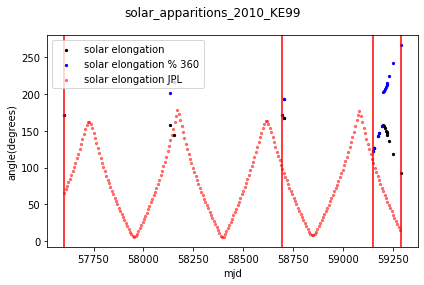

4 3
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_ET56.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_ET56.csv
load data
16.88533714289549
0.114
load Horizons
[57978.6319303 58092.3891077 59084.548403  59256.259861 ]


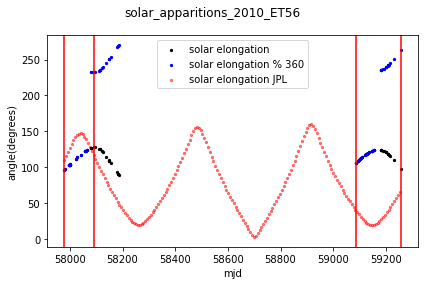

3 3
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Asher.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Asher.csv
load data
17.16948434879181
0.153
load Horizons
[57617.4475397  58004.608229   58221.54450325 58733.430718
 58817.284757  ]


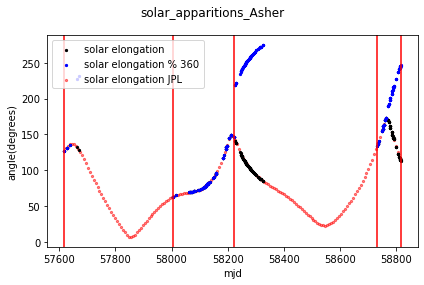

3 4
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_CW205.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_CW205.csv
load data
17.236155159176356
0.246
load Horizons
[57388.25838   58338.5284065 58912.490116 ]


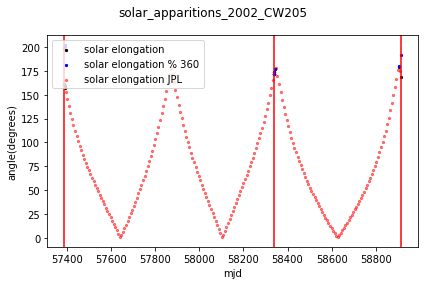

3 2
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_UG.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_UG.csv
load data
16.605586719806126
0.098
load Horizons
[57481.560289   58417.63742505 59083.505417   59083.505417  ]


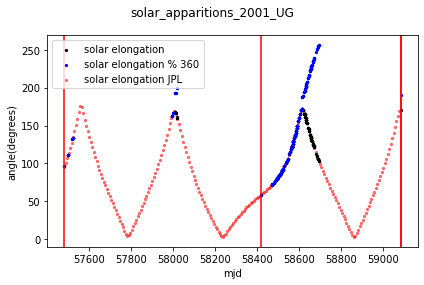

4 3
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_RQ98.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2008_RQ98.csv
load data
16.579221213314526
0.2225
load Horizons
[57521.567998 59043.37331 ]


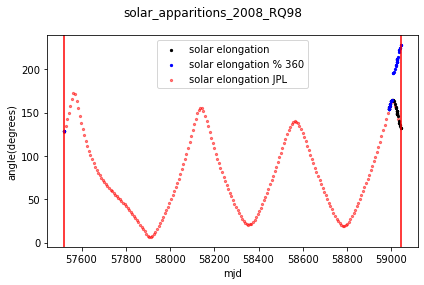

2 1
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_XQ7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_XQ7.csv
load data
16.462425609829275
0.197
load Horizons
[57390.273611 57849.50438  58777.500324 59276.484896 59292.462743]


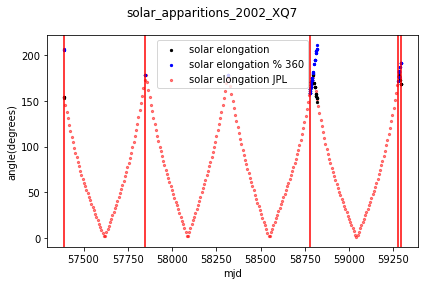

5 4
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_EX144.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_EX144.csv
load data
15.159644753077696
0.057
load Horizons
[57849.559317   58403.57193355 58883.483785  ]


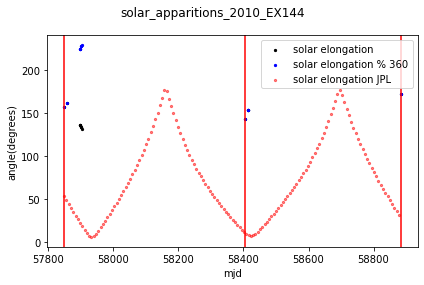

3 2
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_OH12.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2003_OH12.csv
load data
15.22913747839404
0.122
load Horizons
[57388.39294  57816.529641 58620.419479 59021.590718 59269.228044]


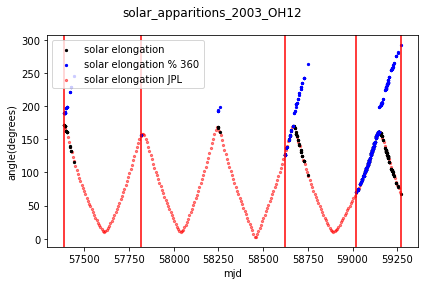

5 4
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_AA108.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_AA108.csv
load data
11.841835819809145
0.04
load Horizons
[57415.385544  57832.432442  58255.4216283 58659.462002  58674.451551 ]


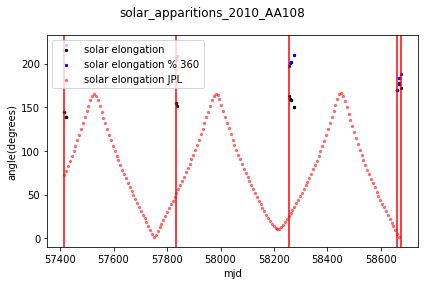

3 4
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_LK60.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_LK60.csv
load data
12.777132710129699
0.089
load Horizons
[57756.601515   58223.46910655 58279.3602217 ]


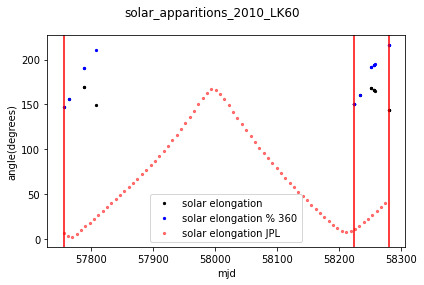

3 2
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_MF86.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_MF86.csv
load data
13.93813289637494
0.077
load Horizons
[57942.4331286  58406.58285435 58452.45991905]


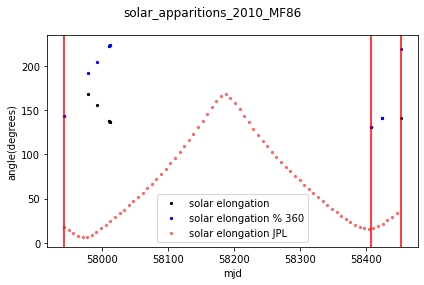

3 2
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_TG99.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_TG99.csv
load data
13.998413246947637
0.217
load Horizons
[57603.512649  58021.5055933 58869.338009  59258.427014  59294.385799 ]


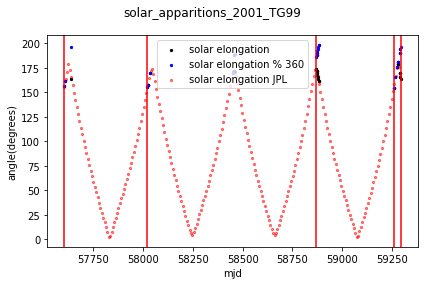

5 4
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_FL77.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_FL77.csv
load data
11.61295826489471
0.0275
load Horizons
[58620.435648 58711.397928]


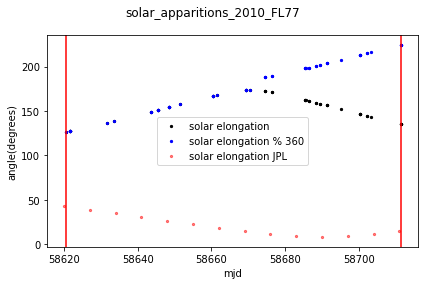

2 1
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_KU49.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_KU49.csv
load data
13.678530394766309
0.128
load Horizons
[57499.495301  57956.5957316 57999.5208991]


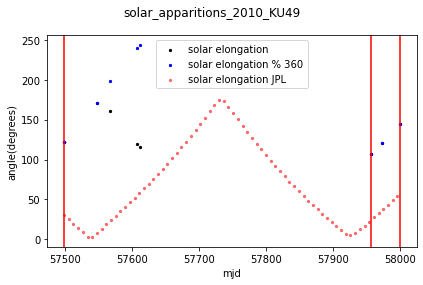

3 2
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_OJ87.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_OJ87.csv
load data
14.220004167590641
0.137
load Horizons
[57761.5238394 59221.446204  59221.446204 ]


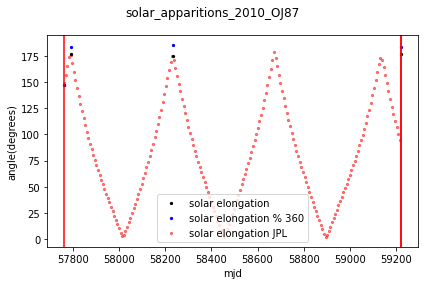

3 2
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_BL27.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2013_BL27.csv
load data
12.521216629673326
0.125
load Horizons
[58254.5879045 58612.603171  59246.220382  59246.220382 ]


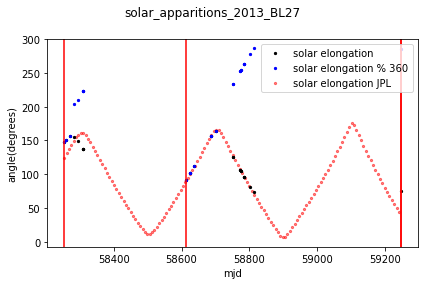

3 3
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_BR88.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_BR88.csv
load data
14.280300092123266
0.076
load Horizons
[57398.286458  57802.4166765 58223.538785  58743.498206  58932.261343 ]


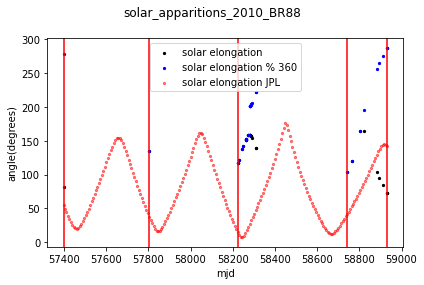

5 4


In [32]:
for name in np.array(df_plot[df_plot["q_perihelion"]>1.3]["name"]):
    sol = sa.solar_apparitions(name=name,data_load_path=data_load_path,eph_load_path=eph_load_path)
    
    tp1 = sol.solar_elongation_JPL()
    tp2 = sol.solar_elongation(-1.0)

#     sol.plot_solar_elongation(tp1)
    sol.plot_solar_elongation(tp2)

    print(len(tp1)-1,len(tp2)-1)

#     break

The MBAs where this fails have an apparition were max solar elongation was not observed, and so the diff is not always negative.

Try look at time gaps as well for these objects, estimate a solar elongation period for MBAs from semimajor axis?

Some near NEO objects will pose a problem, e.g. Asher. rockAtlas elongation does not go from +ve to -ve around opposition

Some objects have rockAtlas elongation that does not match JPL, e.g. 2010 KE99, 2010 ET56, 2010 AA108, 2010 LK60, 2010 MF86, 2010 FL77, 2013 BL27, 2010 BR88. Theses are objects that have double designations on JPL, updated orbits? Some appear incorrect for other reasons, e.g. 2010 EX144, 2010 KU49, 2010 OJ87. The orbits have changed significantly, e.g. 2010 FL77 

Some objects have only a few obs at opposition, e.g. 2002 CW205 as ATLAS only started observing after its first opposition

When adding to code, only check for apparitions once, at start or end?

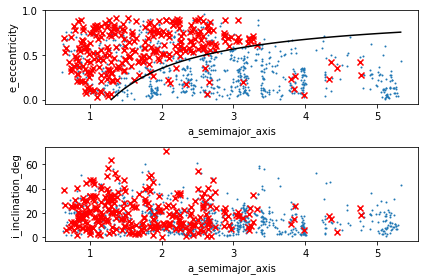

In [33]:
# plot orbital distribution
fig = plt.figure()
gs = gridspec.GridSpec(2, 1)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])

# ax1.scatter(df["a_semimajor_axis"],df["e_eccentricity"],s=1)
# ax2.scatter(df["a_semimajor_axis"],df["i_inclination_deg"],s=1)
ax1.scatter(df_samp["a_semimajor_axis"],df_samp["e_eccentricity"],s=1)
ax2.scatter(df_samp["a_semimajor_axis"],df_samp["i_inclination_deg"],s=1)

ax1.scatter(df_plot["a_semimajor_axis"],df_plot["e_eccentricity"],c="r",marker="x")
ax2.scatter(df_plot["a_semimajor_axis"],df_plot["i_inclination_deg"],c="r",marker="x")

q=1.3 # AU
x_grid=np.linspace(q,np.amax(df_samp["a_semimajor_axis"]))
ax1.plot(x_grid,1.0-(q/x_grid),color="k")

ax1.set_xlabel("a_semimajor_axis")
ax1.set_ylabel("e_eccentricity")

ax2.set_xlabel("a_semimajor_axis")
ax2.set_ylabel("i_inclination_deg")

plt.tight_layout()
plt.show()

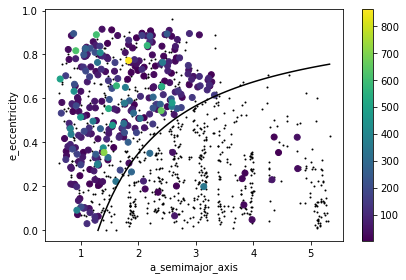

In [34]:
# plot orbital distribution
c_plot = "detection_count"
x_plot = "a_semimajor_axis"
y_plot = "e_eccentricity"

fig = plt.figure()
gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0,0])

df_plot = df_plot.sort_values(c_plot)
# ax1.scatter(df["a_semimajor_axis"],df["e_eccentricity"],s=1)
ax1.scatter(df_samp[x_plot],df_samp[y_plot],c="k",s=1)#,alpha=0.1)
s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],c=df_plot[c_plot])
cbar = fig.colorbar(s1)

q=1.3 # AU
x_grid=np.linspace(q,np.amax(df_samp[x_plot]))
ax1.plot(x_grid,1.0-(q/x_grid),color="k")

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

plt.tight_layout()
plt.show()

# Look up objects that have double designations
see results_analysis/fit_db_analysis/merge_dbs.ipynb

In [35]:
df_des_change = pd.read_csv("/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/fit_db_analysis/df_des_change.csv",index_col=0)

In [36]:
df_des_change

,old_des,new_des,mpc_num
0,2010 AM82,2012 HN91,NaN
1,2010 AN82,2014 WU72,NaN
2,2010 AX82,2010 XH106,NaN
3,2010 AU83,2005 JB194,NaN
4,2010 AQ84,2014 OF157,NaN
...,...,...,...
2157,2010 PB51,2010 VK239,NaN
2158,2010 PJ56,2015 MX134,NaN
2159,2013 BW45,2009 XM12,NaN
2160,2013 JO14,2017 XW42,540939.0


In [37]:
odd_names = np.array(df_plot[df_plot["q_perihelion"]>1.3]["name"])

In [38]:
df_des_change[(np.isin(df_des_change["old_des"],odd_names)) |
             (np.isin(df_des_change["new_des"],odd_names))]

,old_des,new_des,mpc_num
36,2010 AA108,2009 BN200,NaN
452,2010 ET56,2014 BL23,NaN
1038,2010 KE99,2013 CP164,NaN
1164,2010 LK60,2015 FE127,NaN
1305,2010 MF86,2005 WS203,NaN
1606,2013 BL27,2014 EM219,NaN
1928,2010 FL77,2001 YL35,524376.0


# Retry with time diff
Check for drops in angle, or gaps that are comparable to the synodic period

0 2010 OJ87 9.35091584378573
4.43849872
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_OJ87.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_OJ87.csv
load data
14.220004167590641
0.137
load Horizons
synodic period = 408.70778089826064
[57761.5238394  58234.48037135 59221.446204   59221.446204  ]


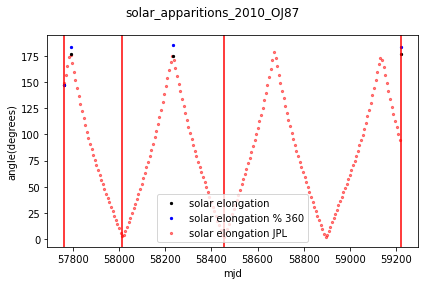

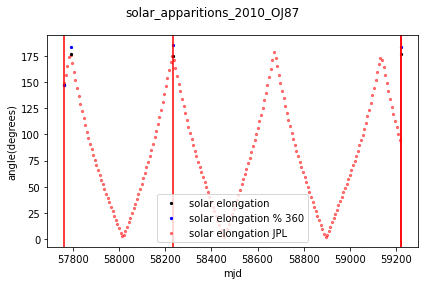

[57761.5238394 58013.        58454.        59221.446204 ]
[57761.5238394  58234.48037135 59221.446204   59221.446204  ]
3 3
1 2010 KU49 9.110649114526915
4.36213947
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_KU49.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_KU49.csv
load data
13.678530394766309
0.128
load Horizons
synodic period = 410.0025632777346
[57499.495301  57956.5957316 57999.5208991]


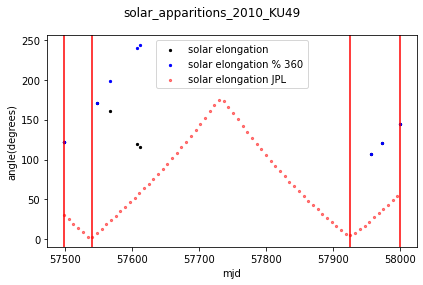

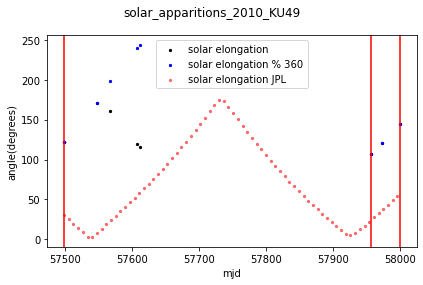

[57499.495301  57541.        57926.        57999.5208991]
[57499.495301  57956.5957316 57999.5208991]
3 2
2 2010 MF86 7.571146419396356
3.8557402
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_MF86.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_MF86.csv
load data
13.93813289637494
0.077
load Horizons
synodic period = 420.54586318798385
[57942.4331286  58406.58285435 58452.45991905]


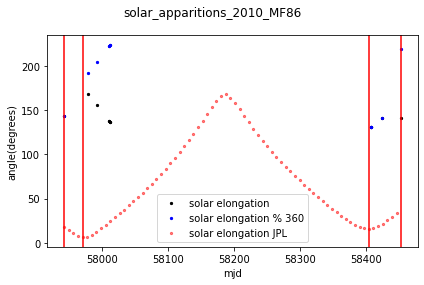

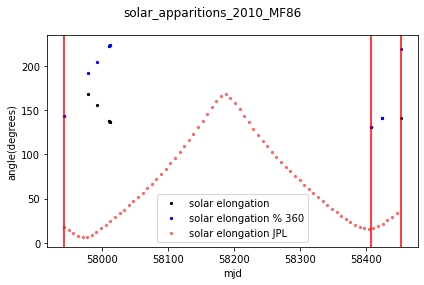

[57942.4331286  57970.         58404.         58452.45991905]
[57942.4331286  58406.58285435 58452.45991905]
3 2
3 2010 EX144 4.3471650665710175
2.66361072
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_EX144.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_EX144.csv
load data
15.159644753077696
0.057
load Horizons
synodic period = 474.04750519935425
[57849.559317   58403.57193355 58883.483785   58883.483785  ]


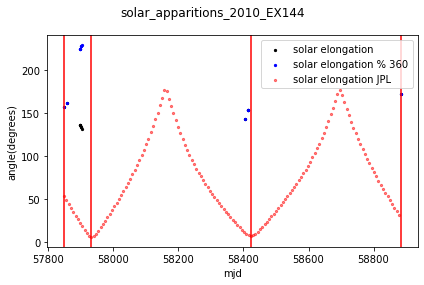

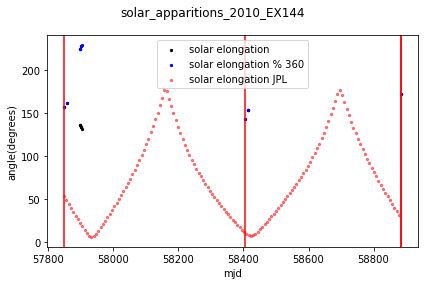

[57849.559317 57933.       58423.       58883.483785]
[57849.559317   58403.57193355 58883.483785   58883.483785  ]
3 3
4 2002 CW205 3.5926076967000715
2.34570394
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_CW205.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_CW205.csv
load data
17.236155159176356
0.246
load Horizons
synodic period = 505.7848940912194
[57388.25838   58338.5284065 58903.49956   58912.490116 ]


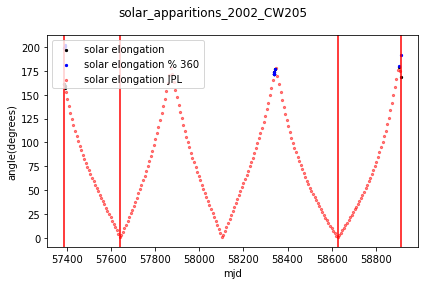

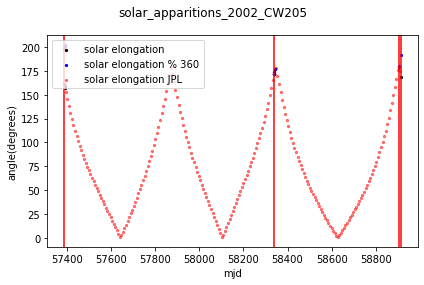

[57388.25838  57640.       58627.       58912.490116]
[57388.25838   58338.5284065 58903.49956   58912.490116 ]
3 3
5 2010 LK60 7.424675790804764
3.80584996
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_LK60.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_LK60.csv
load data
12.777132710129699
0.089
load Horizons
synodic period = 421.8122052979548
[57756.601515   58223.46910655 58279.3602217 ]


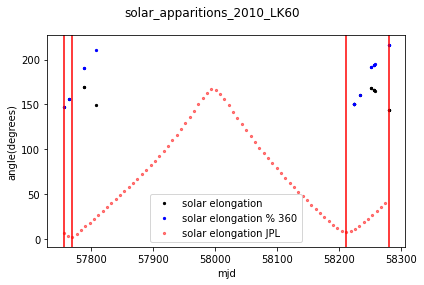

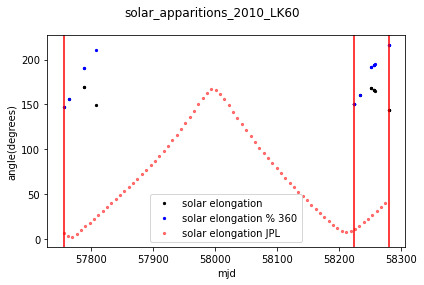

[57756.601515  57770.        58211.        58279.3602217]
[57756.601515   58223.46910655 58279.3602217 ]
3 2
6 2010 KE99 3.085140614092518
2.11925545
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_KE99.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_KE99.csv
load data
15.901418623324812
0.08249999999999999
load Horizons
synodic period = 540.0481466492623
[57603.4850666  58134.49853095 58693.451447   59148.576134
 59287.259699  ]


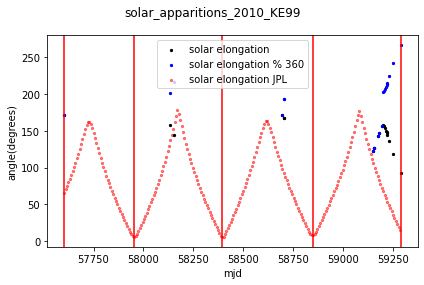

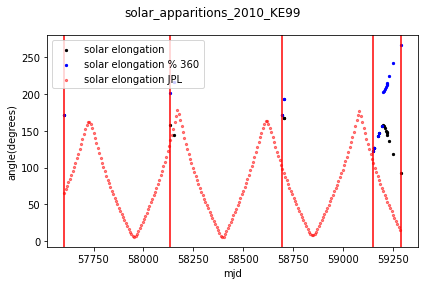

[57603.4850666 57953.        58394.        58849.        59287.259699 ]
[57603.4850666  58134.49853095 58693.451447   59148.576134
 59287.259699  ]
4 4
7 2010 AA108 7.515279885446844
3.83674945
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_AA108.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_AA108.csv
load data
11.841835819809145
0.04
load Horizons
synodic period = 421.0221519900164
[57415.385544  57832.432442  58255.4216283 58659.462002  58674.451551 ]


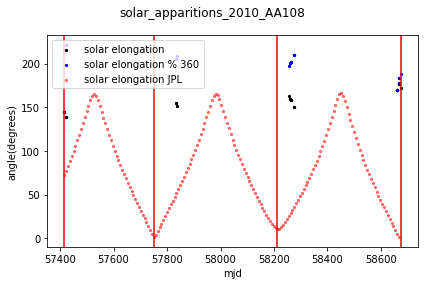

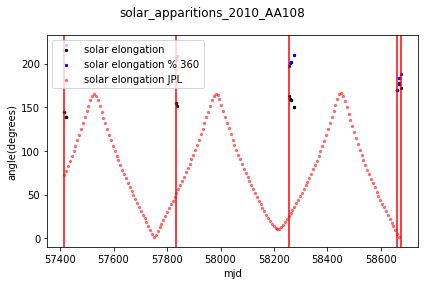

[57415.385544 57751.       58213.       58674.451551]
[57415.385544  57832.432442  58255.4216283 58659.462002  58674.451551 ]
3 4
8 2013 BL27 10.422789359790931
4.77151149
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_BL27.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2013_BL27.csv
load data
12.521216629673326
0.125
load Horizons
synodic period = 403.735875977185
[58254.5879045 58612.603171  59246.220382  59246.220382 ]


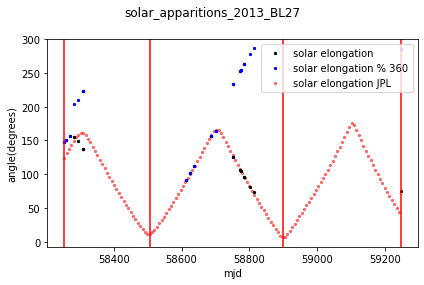

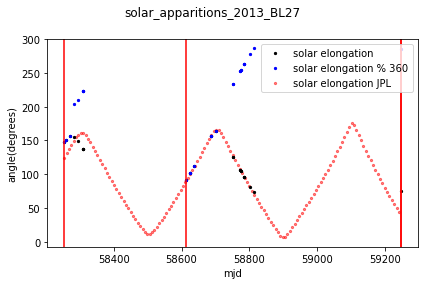

[58254.5879045 58506.        58898.        59246.220382 ]
[58254.5879045 58612.603171  59246.220382  59246.220382 ]
3 3
9 2001 TG99 7.9362737358622715
3.97872961
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_TG99.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_TG99.csv
load data
13.998413246947637
0.217
load Horizons
synodic period = 417.621913998702
[57603.512649   58021.5055933  58449.51821845 58869.338009
 59258.427014   59294.385799  ]


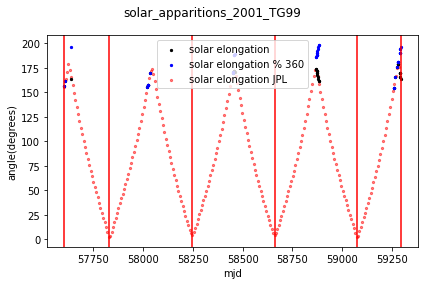

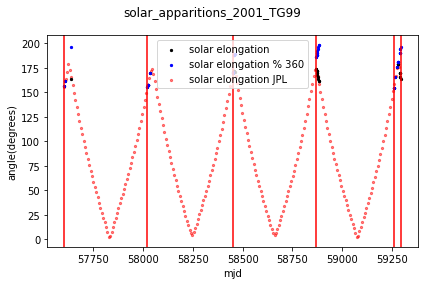

[57603.512649 57827.       58247.       58660.       59073.
 59294.385799]
[57603.512649   58021.5055933  58449.51821845 58869.338009
 59258.427014   59294.385799  ]
5 5
10 2010 BR88 10.395969187320539
4.76332253
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_BR88.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_BR88.csv
load data
14.280300092123266
0.076
load Horizons
synodic period = 403.846444972654
[57398.286458  57802.4166765 58223.538785  58743.498206  58932.261343 ]


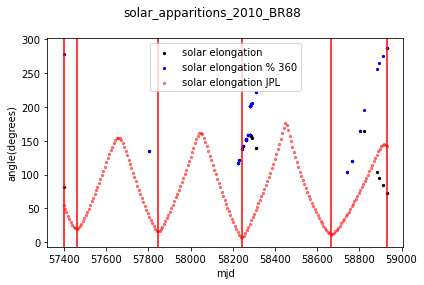

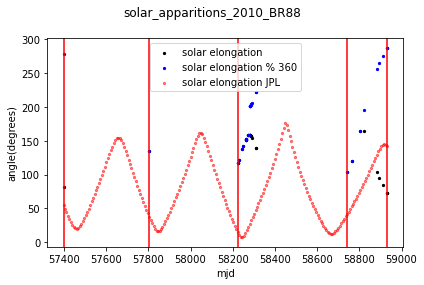

[57398.286458 57461.       57846.       58245.       58665.
 58932.261343]
[57398.286458  57802.4166765 58223.538785  58743.498206  58932.261343 ]
5 4
11 2008 RQ98 4.18716924233147
2.59784764
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_RQ98.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2008_RQ98.csv
load data
16.579221213314526
0.2225
load Horizons
synodic period = 479.5216875063076
[57521.567998 58988.451481 59043.37331 ]


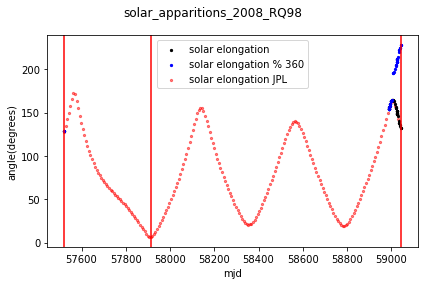

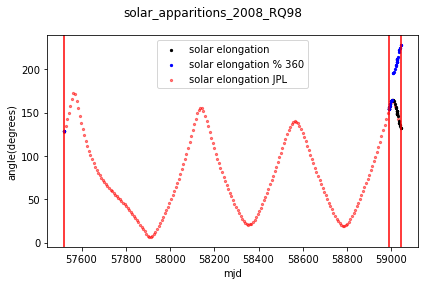

[57521.567998 57913.       59043.37331 ]
[57521.567998 58988.451481 59043.37331 ]
2 2
12 2010 FL77 8.994715239869947
4.32505478
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_FL77.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_FL77.csv
load data
11.61295826489471
0.0275
load Horizons
synodic period = 410.6551595708789
[58620.435648 58711.397928]


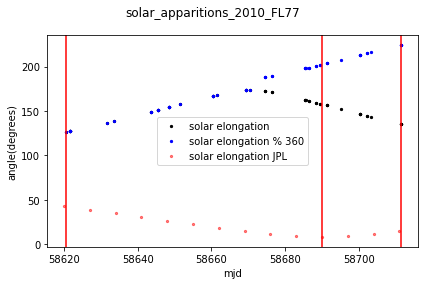

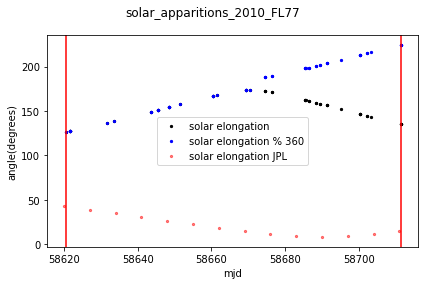

[58620.435648 58690.       58711.397928]
[58620.435648 58711.397928]
2 1
13 2002 XQ7 4.2707627782888995
2.63230959
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_XQ7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_XQ7.csv
load data
16.462425609829275
0.197
load Horizons
synodic period = 476.5947638950905
[57390.273611  57849.50438   58315.4382118 58777.500324  59276.484896
 59292.462743 ]


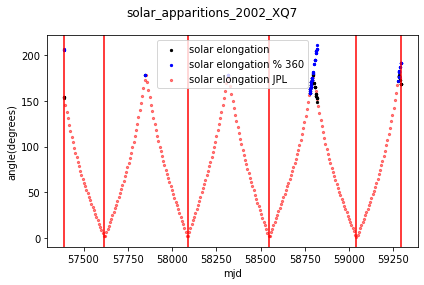

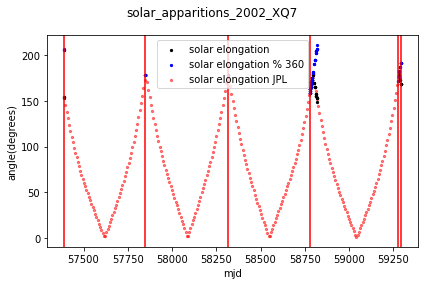

[57390.273611 57614.       58090.       58545.       59042.
 59292.462743]
[57390.273611  57849.50438   58315.4382118 58777.500324  59276.484896
 59292.462743 ]
5 5
14 2010 ET56 3.0227868355799385
2.09060354
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_ET56.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_ET56.csv
load data
16.88533714289549
0.114
load Horizons
synodic period = 545.4441246995527
[57978.6319303 59084.548403  59256.259861 ]


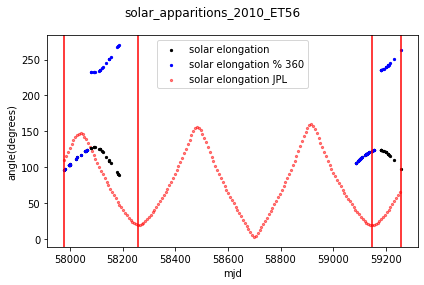

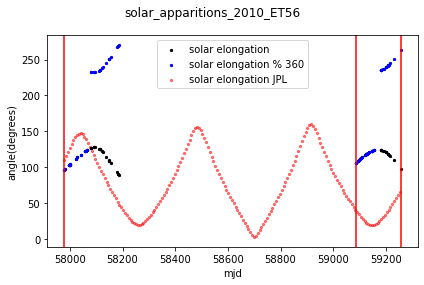

[57978.6319303 58258.        59147.        59256.259861 ]
[57978.6319303 59084.548403  59256.259861 ]
3 2
15 Asher 2.5815377566824846
1.88185282
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Asher.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Asher.csv
load data
17.16948434879181
0.153
load Horizons
synodic period = 595.7880406002085
[57617.4475397 58004.608229  58733.430718  58817.284757 ]


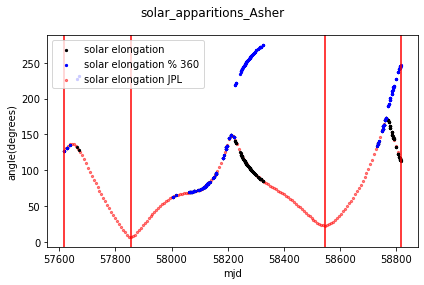

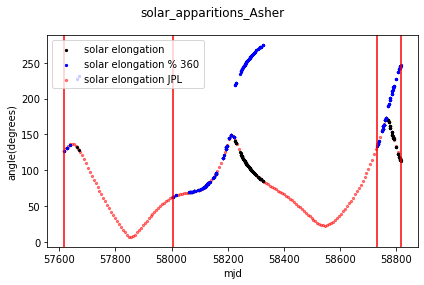

[57617.4475397 57855.        58548.        58817.284757 ]
[57617.4475397 58004.608229  58733.430718  58817.284757 ]
3 3
16 2001 UG 3.264806535310535
2.20075468
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_UG.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_UG.csv
load data
16.605586719806126
0.098
load Horizons
synodic period = 526.1616684733531
[57481.560289   57994.4605087  58417.63742505 59083.505417
 59083.505417  ]


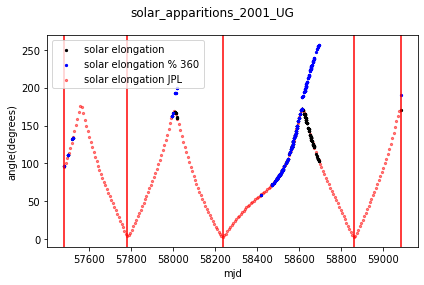

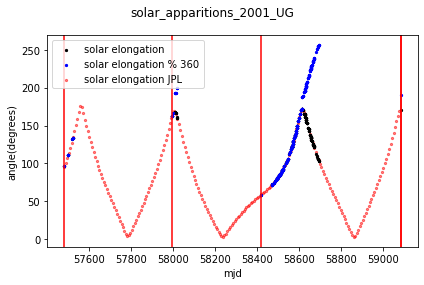

[57481.560289 57782.       58237.       58860.       59083.505417]
[57481.560289   57994.4605087  58417.63742505 59083.505417
 59083.505417  ]
4 4
17 2003 OH12 5.559428112809671
3.13824428
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_OH12.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2003_OH12.csv
load data
15.22913747839404
0.122
load Horizons
synodic period = 445.05389951747145
[57388.39294   57816.529641  58245.4095534 58620.419479  59021.590718
 59269.228044 ]


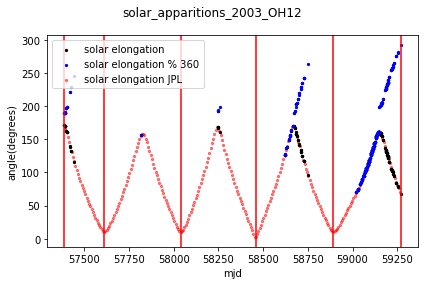

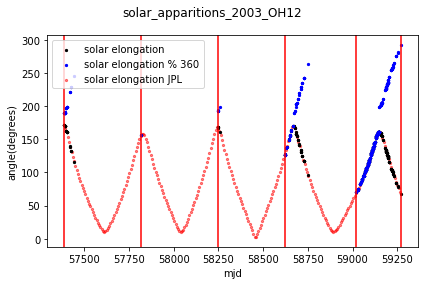

[57388.39294  57612.       58039.       58459.       58893.
 59269.228044]
[57388.39294   57816.529641  58245.4095534 58620.419479  59021.590718
 59269.228044 ]
5 5


In [39]:
_df = df_plot[df_plot["q_perihelion"]>1.3]
for i in range(len(_df)):
    
    name = _df.iloc[i]["name"]
    period = (_df.iloc[i]["a_semimajor_axis"]**1.5)
    
#     if name!="2010 FL77":
#         continue

    print(i,name,period)
    print(_df.iloc[i]["a_semimajor_axis"])

    sol = sa.solar_apparitions(name=name,data_load_path=data_load_path,eph_load_path=eph_load_path)
    
    tp1 = sol.solar_elongation_JPL()
    tp2 = sol.solar_elongation(-1.0,period=period)

    sol.plot_solar_elongation(tp1)
    sol.plot_solar_elongation(tp2)

    print(tp1)
    print(tp2)
    print(len(tp1)-1,len(tp2)-1)

#     break

In [40]:
# see solar_apparitions_uniform_sample.py

result_list = []

for i in range(len(df_samp)):
    name = df_samp.iloc[i]["name"]
    mpc_number = df_samp.iloc[i]["mpc_number"]
    period = df_samp.iloc[i]["a_semimajor_axis"]**1.5
    
    fname = "{}/df_data_{}.csv".format(data_load_path,"_".join(name.split(" ")))
    print(fname)
    
    # only process objects we have already downloaded
    if not os.path.isfile(fname):
        print("not downloaded")
        continue
        
    sol = sa.solar_apparitions(name=name,data_load_path=data_load_path,eph_load_path=eph_load_path)
    tp1 = sol.solar_elongation_JPL(JPL_step="7d")
    tp2 = sol.solar_elongation(sol_elong_diff,period=period)
    
    if len(tp1)==0:
        N_app_JPL = np.nan
    else:
        N_app_JPL = len(tp1)-1
    N_app_diff = len(tp2)-1
    
    orb=list(df_samp.iloc[i][["a_semimajor_axis","e_eccentricity","i_inclination_deg","detection_count"]])    
    results = [mpc_number,name,N_app_diff,N_app_JPL]+orb
    print(results)
    
    result_list.append(results)

#     break
    
# Save the results to csv!
# ALSO RECORD DETECTION COUNT!

/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1997_NC1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1997_NC1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1997_NC1.csv
load data
19.833129113247736
0.21
load Horizons
synodic period = -1502.8533310888051
[57901.2701733  57926.3034814  57926.3121186  57926.3206249
 57928.3080725  57928.3165484  57936.3066961  57936.3153257
 57946.2770051  57950.273259   57950.2880192  57950.2885044
 57950.2998093  57952.2734669  57959.2669314  57961.2875939
 57969.2681516  58097.2130677  58097.2200258  58097.2269263
 58103.2255752  58113.2061937  58113.2200433  58129.20343965
 58129.21285325 58135.22165295 58266.5699533  58266.5778754
 58266.5860055  58295.5969716  58295.6073547  58295.6183307
 58298.5727131  58298.580628   58298.5884757  58298.5964604
 58305.6048222  58305.6149746  58305.6163444  58309.6120273
 58309.6199504  58309

synodic period = -1382.5229201177442
[57744.6463985 57744.6525954 57744.667256  57745.5724647 57745.5729695
 57745.5885407 57745.6071453 57745.620489  57745.6224504 57745.6357874
 57753.5958852 57757.5346998 57757.5465225 57757.5690718 57757.5726179
 57757.593473  57762.4738159 57762.4903295 57762.5009619 57762.5073908
 57762.5202331 57765.4234626 57765.4438061 57766.4845551 57766.494072
 57766.5001344 57766.5114148 57766.5247883 57774.4398663 57774.4573876
 57774.4687934 57774.4839283 57774.493618  57778.4243388 57778.4455013
 57778.4565989 57778.4589258 57778.4747065 57801.2564885 59209.596898
 59209.598889  59209.601748  59209.60853   59219.59662   59219.60728
 59221.576748  59221.581863  59221.586921  59229.626516  59229.636944
 59229.662002  59229.662917  59229.668287  59229.671111  59231.54059
 59231.546551  59231.556667  59238.533623  59238.539688  59238.553218
 59238.562257  59242.482049  59242.496863  59242.513993  59242.589086
 59244.564063  59246.549525  59246.552755  59246.

synodic period = -1046.4423165019564
[57479.2639077 57487.2307562 57487.2391726 57487.2536391 57487.2709419
 57489.2312914 57489.2397855 57489.2546046 57489.2716765 57492.2520329
 57495.266971  57495.266971  57495.2819852 57495.2948259 57498.2382809
 57498.2502477 57498.2691709 57498.281236  57500.299386  57500.3171331
 57512.2413296 57512.2442729 57512.2579833 57512.2672165 57512.2739983
 57515.2469403 57515.2548695 57515.2649377 57515.2717956 57523.263104
 57523.2720857 57523.2844861 57531.2711898 57531.2765208 57535.2485575
 57535.2495277 57535.2519463 57535.2657739 57535.2706146 57542.3320249
 57546.3075032 57546.3182195 57546.3334085 57557.2602689 57557.2738086
 57557.305833  57561.2729747 57561.2763862 57561.2907402 57561.3022188
 57565.2763814 57565.288552  57565.3007023 57565.325282  57582.2680962
 57590.2558529 57599.266927  57599.2776329 57599.2908376 57610.2655566
 57610.2785723 57610.2890384 57853.6301443 57853.6413096 57902.611296
 58561.247558  58561.25691   58570.239109 

/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Hathor.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Hathor.csv
load data
21.74510964960188
0.131
load Horizons
synodic period = -1258.189571225305
[58454.60358655 58458.54859955 58458.55823335 58458.55869065
 58458.57016935 58460.51387075 58460.52633595 58460.52771805
 58460.53112455 58460.54279165 58462.53521715 58462.54403855
 58462.56114205 58464.50180495 58464.51009525 58464.51817805
 58464.52631205 58468.47878485 58468.48268285 58468.49078955
 58468.49521985 58470.47525225 58470.48382515 58470.49224775
 58470.50039825 58472.46441405 58472.47290015 58472.48100775
 58472.48922855 58476.47790505 58476.48699855 58478.46167055
 58478.46979685 58478.47118335 58478.47782535 58478.47930735
 58478.48582225 58478.48732695 58478.49566265 58480.46421765
 58480.47229175 58480.48035205 58485.44692045 58485.45660025
 58485.46578105 58485.47502115 58487.43074275 58487.4

/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_JF42.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_JF42.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_JF42.csv
load data
21.15541872543401
0.1605
load Horizons
synodic period = -447.3315898452179
[57511.5911811 57511.598474  57511.6100902 57881.2414945 57881.2441107
 57881.2592521 57881.2739092 57885.239051  57885.2468604 57885.2564594
 57885.272146  57885.275795  57892.2985263 57892.2985263 57892.3121078
 57892.3260737 57892.3397397 57892.353949  57896.3532341 57900.3036587
 57916.2564504 57916.262917  57916.2649277 57916.274583  57916.277072
 57916.289649  57916.292217  57916.3055616 57916.3092802 59359.608252
 59359.608252 ]
[467460.0, '2006 JF42', 30, 3, 0.67183736, 0.58167011, 5.950237, 29.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_YS.csv
/Users/jrobi

22.0216647291822
0.076
load Horizons
synodic period = -451.9124260541795
[59005.550579 59006.595579 59007.515127 59007.517431 59007.523009
 59007.534086 59011.58581  59011.588576 59015.508785 59015.512002
 59015.517083 59015.526308 59016.492801 59016.525498 59017.496192
 59017.498021 59017.500764 59017.514005 59021.482407 59021.48566
 59021.493981 59021.528785 59027.387662 59027.39088  59027.39088
 59027.396875 59027.396875 59027.407002 59029.382616 59029.385856
 59029.391817 59029.391817 59037.363866 59037.368472 59037.375822
 59037.3889   59039.306667 59039.306667 59039.309896 59039.315428
 59039.327442 59041.273935 59041.277604 59041.283113 59041.297326
 59041.297326]
[437844.0, '1999 MN', 45, 1, 0.6738851, 0.66537528, 2.021058, 45.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_PK9.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_PK9.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/sol

18.63809879083515
0.191
load Horizons
synodic period = -5709.049259320958
[58576.227604 58583.246597 58850.21485  58873.208009 58873.2186
 58873.229699 58875.207743 58881.213218 58881.21875  58899.220081
 58899.220081 58913.244144 58913.261285 58914.247546 58932.228634
 58961.270093 58969.250058 58969.262037 58985.239236 59163.202361
 59163.210648 59163.222176 59164.205799 59164.205799 59164.20963
 59164.215162 59184.209572 59184.222014 59186.201771 59186.207303
 59186.22015  59192.214792 59192.233692 59194.213032 59194.216227
 59209.217292 59209.22375  59209.235278 59217.208912 59217.213056
 59217.219039 59217.229641 59219.242569 59219.242569 59227.212708
 59227.216817 59227.222766 59227.232824 59243.22331  59243.229722
 59251.248287 59251.26478  59258.217176 59258.218102 59258.225498
 59258.237558 59268.247963 59268.252095 59299.269873 59305.25434
 59305.264479 59313.249502 59313.25919  59313.273542 59329.280382
 59331.265926 59337.258785 59337.262025 59337.268021 59345.239248
 59345

synodic period = -16179.572945155005
[57481.294035  57481.3018756 57481.3087714 57481.3185755 57481.3229707
 57481.3376955 57490.325625  57490.3437882 57490.3646266 57846.620984
 57847.6141952 57849.5569257 57849.5753996 57849.57816   57849.592454
 57849.607338  57849.62206   57852.4611817 57852.4742945 57852.4905847
 57852.5223051 57858.553287  57859.546609  57860.541678  57863.61169
 57863.61169  ]
[nan, '2016 GH135', 25, 2, 0.98523764, 0.1445911, 20.983497, 25.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_WN10.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_WN10.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2000_WN10.csv
load data
21.573791717895503
0.121
load Horizons
synodic period = 192421.090036416
[57699.4672877 59169.361933  59197.316493 ]
[138852.0, '2000 WN10', 2, 5, 1.00126659, 0.29819854, 21.508491, 173.0]
/Users/jrobinson/atlas-phase-curve

synodic period = -1793.9601717153212
[58844.505741 58844.50919  58844.516505 58844.527222 58846.47169
 58846.475208 58846.481863 58846.49309  58850.481574 58850.484387
 58850.491134 58850.50125  58852.413646 58852.418206 58852.427083
 58852.441713 58865.486134 58865.491655 58867.458507 58869.430637
 58869.457153 58871.474514 58871.477535 58871.482836 58871.500463
 58873.394502 58873.401852 58873.419988 58875.402014 58875.40522
 58875.413009 58875.431725 58876.334792 58876.337581 58876.343299
 58876.353275 58878.349225 58878.3525   58878.358981 58878.370046
 58880.341551 58880.34537  58880.351528 58882.299537 58882.307928
 58882.31816  58882.31816 ]
[427778.0, '2005 BE', 46, 1, 0.88385043, 0.42111093, 31.191045, 46.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_VG13.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_VG13.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_file

19.96554254386433
0.176
load Horizons
synodic period = 4461.7617824322815
[57460.6014471  57804.667199   58132.64378085 58467.637083
 58888.301597  ]
[154652.0, '2004 EP20', 4, 5, 1.05854773, 0.45056548, 16.175747, 190.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_AW52.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_AW52.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2013_AW52.csv
load data
21.195996145948374
0.122
load Horizons
synodic period = 2439.274869586376
[58850.64625  58883.461609]
[nan, '2013 AW52', 1, 1, 1.11411398, 0.48797973, 19.006223, 51.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_AC.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_AC.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2005_AC.csv
load data
20.1

synodic period = -1780.0378013298248
[58244.3208472 58244.3293409 58244.3360047 58244.3454284 58244.3477743
 58248.3274652 58248.3321668 58248.3414579 58248.3475639 58248.3508024
 58248.3535706 58248.3582397 58248.3657062 58250.3408769 58250.342265
 58250.3506571 58250.3534163 58251.4267117 58251.43762   58251.450789
 58251.4675663 58252.3597401 58252.3764015 58252.3773301 58252.3954293
 58252.3958858 58252.4092583 58252.4106363 58252.4286376 58254.3711659
 58254.3808474 58256.3695595 58256.3774811 58256.3811424 58256.3951423
 58258.38273   58258.4096876 58258.433254  58260.3892886 58260.4060548
 58260.416067  58260.4303604 58262.3583557 58264.357709  58264.3646407
 58264.3721935 58264.3735617 58264.3832382 58264.3841499 58264.391752
 58264.4013533 58266.3678264 58266.3749017 58270.3546639 58270.3737785
 58270.3777045 58272.3517254 58272.3651867 58272.3695493 58274.339066
 58274.3484477 58274.3614184 58274.3662162 58275.3588726 58275.3701428
 58275.3819759 58275.392816  58279.3781952 5

 59229.548461  ]
[141498.0, '2002 EZ16', 196, 4, 0.92156457, 0.56655348, 30.139765, 196.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_TX44.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_TX44.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_TX44.csv
load data
20.487690362015883
0.093
load Horizons
synodic period = -1642.42162234261
[58756.48265  58756.491944 58756.502639 58762.495336 58762.499062
 58762.515486 58764.471713 58764.474931 58764.48191  58764.492697
 58769.641794 58774.552604 58774.555914 58774.561493 58774.573137
 58778.479444 58778.483322 58778.4889   58778.508368 58780.42147
 58780.424375 58780.431736 58780.441887 58782.471528 58782.474734
 58782.503958 58782.511354 58784.445856 58784.449363 58784.456157
 58784.475266 58787.439618 58787.452593 58787.45581  58787.46691
 58788.441447 58788.448715 58788.462951 58789.416435 58789.419664
 58

18.07215079139714
0.126
load Horizons
synodic period = 25920.247989352847
[58095.209074   58479.20330745 58868.214664   59227.205845  ]
[530871.0, '2011 WS2', 3, 4, 1.00949933, 0.74342577, 46.785124, 49.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_FV5.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_FV5.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_FV5.csv
load data
19.5281416333485
0.085
load Horizons
synodic period = 3104.589277698833
[58180.59475365 58931.62897    58977.376852  ]
[141525.0, '2002 FV5', 2, 3, 1.08695725, 0.7246467, 34.034131, 197.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1991_VE.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1991_VE.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1991_VE.csv
load data
19

synodic period = -2438.1250066923653
[57774.4179411  57774.4309968  57774.451959   57774.4604077
 57778.4060858  57778.4183858  57778.4257818  57778.4324192
 57778.4344307  57778.4398119  57778.4511821  57778.4516571
 57778.4717484  57782.3824036  57782.392242   57782.4248961
 57782.4372336  57786.3749832  57786.3754589  57786.3846835
 57786.4304002  57794.3392321  57794.358519   57798.332338
 57798.3511838  57806.3355736  58130.64721755 58130.65572535
 59181.496192   59181.496192   59181.501273   59181.5114
 59181.5114     59181.511863   59181.520625   59181.521088
 59181.521088   59187.483588   59187.493715   59187.493715
 59187.497859   59187.504745   59189.379514   59189.387014
 59189.391169   59189.400949   59191.350926   59191.354155
 59191.362512   59191.372269   59193.374375   59193.377593
 59193.383646   59193.395856   59195.367419   59195.371574
 59195.378576   59195.393067   59197.338877   59197.343137
 59197.350185   59197.360347   59199.395347   59199.400463
 59199.43     

synodic period = 1112.129518761685
[58081.5888884 59200.607847  59200.61838  ]
[417201.0, '2005 XM4', 2, 2, 1.30368594, 0.06407211, 34.145816, 33.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_FD7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_FD7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2014_FD7.csv
load data
21.85293342661793
0.215
load Horizons
synodic period = 1507.190205654868
[58220.54512185 58221.53395295]
[nan, '2014 FD7', 1, 1, 1.2030576, 0.04908831, 15.456936, 3.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_LP28.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_LP28.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1999_LP28.csv
load data
21.064938854425925
0.083
load Horizons
synodic period = 1420.1355609266934

/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2007_XF25.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2007_XF25.csv
load data
20.26794538004865
0.081
load Horizons
synodic period = 1638.0190665931616
[57745.4538759 57756.471227 ]
[484403.0, '2007 XF25', 1, 1, 1.18301258, 0.132235, 24.487588, 3.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_UD22.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_UD22.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2003_UD22.csv
load data
20.01662438381908
0.19
load Horizons
synodic period = 1750.611797625145
[57799.472045  58064.5638858 58099.4134735]
[323300.0, '2003 UD22', 2, 2, 1.16868872, 0.3183403, 10.076362, 67.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_DJ56.csv
/Users/jrobinson/atlas-phase-c

22.53625535331833
0.189
load Horizons
synodic period = 1126.2380125679995
[57413.326528   58493.60518215 58506.65119825]
[375054.0, '2007 PF6', 2, 2, 1.29839393, 0.41644506, 25.602999, 33.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1992_QN.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1992_QN.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1992_QN.csv
load data
18.526130180520155
0.089
load Horizons
synodic period = 1589.5131220516544
[58007.6089016  58279.5854851  58436.31976845]
[17511.0, '1992 QN', 2, 2, 1.18996389, 0.35890761, 9.583502, 315.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1994_LX.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1994_LX.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1994_LX.csv
load data
16.292560083414408


20.481588868616864
0.2095
query Horizons
dates equal, just use upper and lower mjds
synodic period = 1967.9199456285148
[58849.503426 58849.522986]
[204131.0, '2003 YL', 1, 1, 1.14656073, 0.63249302, 5.656487, 4.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_QX432.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_QX432.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2014_QX432.csv
load data
21.98150812068668
0.11
load Horizons
synodic period = 976.2077914660275
[57942.2654713 57973.412847 ]
[nan, '2014 QX432', 1, 1, 1.36637191, 0.58704172, 6.439323, 27.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_XM69.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_XM69.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_XM69.csv
load data
19

synodic period = 1431.8003194114362
[58829.185972 58845.361539]
[nan, '2011 WN15', 1, 1, 1.21674493, 0.85797991, 33.443729, 27.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_TH10.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_TH10.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2004_TH10.csv
load data
19.53332459854271
0.0665
load Horizons
synodic period = 1282.0568435724754
[58407.46078805 59058.579537   59098.405012  ]
[308043.0, '2004 TH10', 2, 2, 1.25028019, 0.82889165, 14.29396, 108.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_GJ4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_GJ4.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1999_GJ4.csv
load data
16.466612474262604
0.109
load Horizons
synodic period = 1029.8608205

[162873.0, '2001 FB7', 1, 1, 1.40053679, 0.08631726, 20.194693, 2.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_AZ85.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_AZ85.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_AZ85.csv
load data
17.87789830133513
0.112
load Horizons
synodic period = 856.9412959277256
[57903.451957 58667.553565 58836.279769]
[nan, '2010 AZ85', 2, 2, 1.44774429, 0.00025639, 17.768382, 19.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Eureka.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Eureka.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Eureka.csv
load data
17.27494932561112
0.123
load Horizons
synodic period = 779.5162217736863
[57380.529653  58028.6288437 58788.612083  59226.206852 ]
[5261.0, 'Eureka'

[57929.597523 57929.598484]
[nan, '2017 KS31', 1, 1, 1.4983438, 0.2949692, 6.801362, 3.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2007_TF68.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2007_TF68.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2007_TF68.csv
load data
22.60391723103816
0.226
query Horizons
dates equal, just use upper and lower mjds
synodic period = 911.3885270754245
[58037.4126151 58037.4281314]
[nan, '2007 TF68', 1, 1, 1.40648355, 0.26541568, 26.197023, 3.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2007_LV19.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2007_LV19.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2007_LV19.csv
load data
19.6626347204416
0.1395
load Horizons
synodic period = 829.8076576445576
[57405.601505

synodic period = 814.324725509539
[57907.2988101 57933.4260333]
[418094.0, '2007 WV4', 1, 1, 1.48647703, 0.44096064, 38.329073, 59.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1997_XF11.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1997_XF11.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1997_XF11.csv
load data
17.622572255360883
0.148
load Horizons
synodic period = 863.0309698730007
[57438.621817   57685.618849   58486.53679355 59248.563611
 59402.259086  ]
[35396.0, '1997 XF11', 4, 4, 1.44271325, 0.48402954, 4.099078, 187.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_RZ73.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_RZ73.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2013_RZ73.csv
load data
22.825971927625112
0.16
query Hori

load Horizons
synodic period = 819.8451690121987
[58498.22196485 58952.464155   59181.580995   59277.431146  ]
[152941.0, '2000 FM10', 3, 3, 1.48108109, 0.68080823, 8.735089, 138.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2015_UM67.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2015_UM67.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2015_UM67.csv
load data
19.548111886138077
0.167
load Horizons
synodic period = 751.3736154590671
[58022.6050882 58808.484236  58808.502917 ]
[506074.0, '2015 UM67', 2, 2, 1.55799354, 0.68717868, 6.005009, 67.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_CL19.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_CL19.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_CL19.csv
load data
18.41665249659517


synodic period = 603.7316845755887
[57994.5081021 58571.520162  58605.463252 ]
[412009.0, '2012 RB2', 2, 2, 1.85619075, 0.07330349, 22.817953, 54.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_QY106.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_QY106.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_QY106.csv
load data
17.317829148647405
0.1585
load Horizons
synodic period = 602.44421993414
[57521.5782596  58132.55817025 59357.462847   59403.358056  ]
[nan, '2001 QY106', 3, 3, 1.86024506, 0.03512232, 20.02388, 20.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_YO94.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_YO94.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2003_YO94.csv
load data
18.22989212205637
0.2375
load Horiz

synodic period = 646.2144308564921
[58431.53998685 58966.491007   59033.320822  ]
[545787.0, '2011 UW62', 2, 2, 1.74137658, 0.25059325, 31.480911, 122.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1998_SF35.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1998_SF35.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1998_SF35.csv
load data
18.89676561094674
0.139
load Horizons
synodic period = 672.2985088463836
[58569.541007 59117.535266 59293.283796 59327.283021]
[185716.0, '1998 SF35', 3, 3, 1.68526343, 0.27393143, 35.184951, 185.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Bede.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Bede.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Bede.csv
load data
15.678737765232547
0.084
load Horizons
synodic per

/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_GW.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_GW.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2003_GW.csv
load data
17.630106051591348
0.139
load Horizons
synodic period = 615.6690453659174
[58158.60584315 58207.60876725 59186.193958   59208.205382  ]
[350988.0, '2003 GW', 3, 3, 1.82038986, 0.47626175, 49.438746, 73.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_UD1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2008_UD1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2008_UD1.csv
load data
21.075959420656805
0.092
load Horizons
synodic period = 657.4127312476901
[57380.478356 57555.477338]
[451003.0, '2008 UD1', 1, 2, 1.71617362, 0.46348944, 6.478994, 29.0]
/Users/jrobinson/atla

synodic period = 611.3531368242116
[58800.602106 58850.661435]
[nan, '2014 HM178', 1, 1, 1.83297285, 0.64503556, 21.590111, 36.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_LC2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_LC2.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2004_LC2.csv
load data
19.62594875117168
0.052
load Horizons
synodic period = 601.0926276907048
[58844.635428 58900.465613]
[416591.0, '2004 LC2', 1, 1, 1.86454406, 0.73470519, 10.982399, 59.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Midas.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Midas.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Midas.csv
load data
16.306599248701367
0.1105
load Horizons
synodic period = 631.9326141849543
[58119.6706648 58360.612853

17.688403120165756
0.161
load Horizons
synodic period = 640.3985335232061
[58614.497951 58956.419792 58956.419792]
[277142.0, '2005 LG8', 2, 2, 1.75519674, 0.82721614, 26.563091, 111.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1974_MA.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1974_MA.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1974_MA.csv
load data
14.986501837884765
0.074
load Horizons
synodic period = 628.5099979686577
[58633.559641 58781.209294]
[5660.0, '1974 MA', 1, 1, 1.78515828, 0.76196087, 38.130866, 39.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1995_YR1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1995_YR1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1995_YR1.csv
load data
20.58576872310828
0.155
load Horizons
syno

synodic period = 580.8045810302443
[58721.413715 58775.323044]
[509367.0, '2007 BU20', 1, 1, 1.93484531, 0.11028323, 17.725777, 43.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_TG60.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_TG60.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_TG60.csv
load data
16.94897002529832
0.172
load Horizons
synodic period = 579.5991730381205
[57751.5713564 58307.5814549 58927.500856  58966.38544  ]
[326650.0, '2002 TG60', 3, 3, 1.93939591, 0.10954982, 22.610238, 85.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2009_FG30.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2009_FG30.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2009_FG30.csv
load data
17.822107838247792
0.186
load Horizons
synodic perio

query Horizons
dates equal, just use upper and lower mjds
synodic period = 594.5126187229507
[58517.440961 58517.465127]
[139056.0, '2001 FY', 1, 1, 1.88612153, 0.32717448, 4.733604, 3.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Hippolyta.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Hippolyta.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Hippolyta.csv
load data
17.117932022638083
0.208
load Horizons
synodic period = 570.6100175474314
[57575.6053315 58736.517766  59216.459317  59270.380729 ]
[10295.0, 'Hippolyta', 3, 3, 1.97483166, 0.33328847, 19.238842, 146.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1997_GH28.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1997_GH28.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1997_GH28.csv
load da

19.75903334896821
0.0865
load Horizons
synodic period = 550.7197043243004
[57380.313681   58455.62908325 58508.42374255]
[nan, '2013 AV60', 2, 2, 2.06402564, 0.73250451, 7.377451, 110.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_QL433.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_QL433.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2014_QL433.csv
load data
20.79457624048245
0.127
load Horizons
synodic period = 545.2140911050407
[59053.580891 59096.508009]
[nan, '2014 QL433', 1, 1, 2.09179386, 0.71770699, 4.427532, 53.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_BG14.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_BG14.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2005_BG14.csv
load data
17.88853345138065
0.157
load Ho

17.780483790687185
0.1975
load Horizons
synodic period = 533.0701044845465
[57895.537662 58943.501655 58971.417894]
[233491.0, '2007 CL5', 2, 2, 2.15871796, 0.10139092, 7.318608, 20.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2015_RN214.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2015_RN214.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2015_RN214.csv
load data
18.09340675365234
0.1965
load Horizons
synodic period = 535.4383354292756
[58338.5172288 58342.5285673]
[452212.0, '2015 RN214', 1, 1, 2.14500406, 0.08100964, 4.091559, 4.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1998_SP18.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1998_SP18.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1998_SP18.csv
load data
17.36996086219686
0.225
lo

synodic period = 503.4892260273597
[57406.632326   57935.6181787  58417.59202615 58869.632153
 59155.218113  ]
[916.0, 'America', 4, 4, 2.36437375, 0.23659157, 11.096658, 1208.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_TF38.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_TF38.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_TF38.csv
load data
17.898628348883033
0.179
load Horizons
synodic period = 506.0219626888222
[57601.4072082 59131.580081  59205.352778 ]
[220113.0, '2002 TF38', 2, 2, 2.34380643, 0.24111462, 2.858842, 71.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_UG116.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_UG116.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2005_UG116.csv
load data
18.15202658862463


synodic period = 518.2742202927217
[58180.641771 59291.566794 59413.307407]
[37336.0, '2001 RM', 2, 3, 2.2528226, 0.48369552, 36.671622, 149.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1994_RH.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1994_RH.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1994_RH.csv
load data
16.605433811843216
0.192
load Horizons
synodic period = 518.947114258301
[58468.63530875 59372.612002   59412.525127  ]
[32906.0, '1994 RH', 2, 2, 2.24819701, 0.43998572, 18.938336, 157.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Miwablock.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Miwablock.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Miwablock.csv
load data
15.500647081559762
0.1
load Horizons
synodic period = 525.942

synodic period = 518.0805230362747
[58473.62354185 58497.67056235 58536.663437   58536.663437  ]
[329395.0, '2002 AC', 3, 1, 2.25416076, 0.64835373, 34.747717, 7.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2007_VW137.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2007_VW137.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2007_VW137.csv
load data
19.414661240237013
0.195
load Horizons
synodic period = 521.9010863156814
[58073.4347843  58147.22760495]
[506859.0, '2007 VW137', 1, 1, 2.22830602, 0.73912469, 5.945542, 76.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_LO7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_LO7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_LO7.csv
load data
15.028090818998171
0.112
load Horizons
synodic

synodic period = 479.76556549543
[57599.6071992 58058.600449  58559.621794  58989.592014  59257.235799 ]
[96788.0, '1999 RU105', 4, 4, 2.59504553, 0.09501506, 12.990597, 599.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_DV106.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_DV106.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2014_DV106.csv
load data
16.210489143327866
0.1725
load Horizons
synodic period = 495.078230274104
[58206.47832765 58226.51626285]
[396372.0, '2014 DV106', 1, 1, 2.4376956, 0.0854021, 6.528627, 4.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1992_EY13.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1992_EY13.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1992_EY13.csv
load data
15.591049641684975
0.163
load Hori

16.883997706146427
0.182
load Horizons
synodic period = 495.3178166772579
[57452.58732   57992.4722219 58912.614919  59040.352002 ]
[259744.0, '2003 YT166', 3, 3, 2.43549235, 0.16097006, 6.711782, 176.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_RD44.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_RD44.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_RD44.csv
load data
17.23062531309981
0.169
load Horizons
synodic period = 498.4131581617982
[57961.6048831 58991.478727  58991.506921 ]
[307337.0, '2002 RD44', 2, 2, 2.40765297, 0.1846267, 3.374808, 127.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2011_VY10.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2011_VY10.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2011_VY10.csv
load da

synodic period = 479.7676756604823
[57385.19956 58691.48978 58759.34162]
[nan, '2008 BF2', 2, 2, 2.59502133, 0.46978906, 22.533301, 66.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1995_QX9.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1995_QX9.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1995_QX9.csv
load data
17.75396535234016
0.207
load Horizons
synodic period = 481.75352090069333
[59095.544688 59195.482245]
[433940.0, '1995 QX9', 1, 1, 2.57258623, 0.43958015, 8.32353, 95.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_ESA.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_ESA.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_ESA.csv
load data
16.47168362190728
0.1365
load Horizons
synodic period = 495.10244029802226
[57905.6174002  58161.4799

synodic period = 484.1894208335149
[58503.22737905 58542.474236  ]
[419880.0, '2011 AH37', 1, 1, 2.54596087, 0.67199597, 9.65783, 38.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_QD7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_QD7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_QD7.csv
load data
19.309209287655072
0.1115
load Horizons
synodic period = 496.85144551389925
[57927.545961   58054.6400458  58164.49168105]
[495848.0, '2002 QD7', 2, 2, 2.42155558, 0.64730817, 11.631974, 254.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_NL8.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_NL8.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2004_NL8.csv
load data
17.448127962180177
0.194
load Horizons
synodic period = 481.4738

synodic period = 488.5922645709353
[57545.3293946 58705.382894  58974.596586  59078.305579 ]
[331471.0, '1984 QY1', 3, 3, 2.50017379, 0.89386179, 14.282686, 250.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_EY.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_EY.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2005_EY.csv
load data
18.084910002918342
0.201
load Horizons
synodic period = 486.98917766243966
[57746.4400688 59206.425058  59307.270937 ]
[351370.0, '2005 EY', 2, 2, 2.51651006, 0.89078349, 17.225499, 55.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_KY127.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_KY127.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_KY127.csv
load data
16.56925314005947
0.168
query Horizons


[272280.0, '2005 RM41', 2, 2, 2.79690322, 0.04838385, 4.956761, 21.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_SR314.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_SR314.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_SR314.csv
load data
16.54932811072271
0.1995
load Horizons
synodic period = 474.6500119151537
[58306.6146577  58381.35501885]
[110351.0, '2001 SR314', 1, 1, 2.65609258, 0.09744589, 6.267233, 42.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_DB6.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_DB6.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_DB6.csv
load data
16.50953412994437
0.20600000000000002
load Horizons
synodic period = 476.82699158940267
[57988.4858014  58490.53819435 58545.422801  ]
[37020

load Horizons
synodic period = 473.2740728687565
[57452.558223  58322.5435626 58808.627569  58917.391516 ]
[109712.0, '2001 RH46', 3, 3, 2.6733685, 0.25822445, 12.966064, 71.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_NX101.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_NX101.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_NX101.csv
load data
16.944883914220274
0.166
load Horizons
synodic period = 471.05661846908333
[57395.527789 58751.403611 58837.302998]
[275295.0, '2010 NX101', 2, 2, 2.70203035, 0.22373153, 8.716843, 88.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_ND20.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_ND20.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_ND20.csv
load data
16.227729529404776
0.

18.908983196210432
0.156
load Horizons
synodic period = 473.31776306546305
[57816.57522   58006.3096169]
[nan, '2004 MA7', 1, 2, 2.67281406, 0.50081247, 26.30718, 281.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_SK77.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_SK77.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_SK77.csv
load data
15.960830660621951
0.1505
load Horizons
synodic period = 468.8781020670548
[58493.58603765 59141.435185   59163.514514  ]
[304292.0, '2006 SK77', 2, 2, 2.73122385, 0.46019966, 19.901166, 210.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_KY1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_KY1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2013_KY1.csv
load data
19.01250756278336
0.235
loa

[nan, '2017 DT37', 1, 1, 2.69530596, 0.54604865, 19.943602, 81.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_AP60.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_AP60.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2013_AP60.csv
load data
17.86604728922653
0.107
load Horizons
synodic period = 459.4971443774654
[57842.350914  58056.3812983 58111.4045282]
[500749.0, '2013 AP60', 2, 2, 2.8701819, 0.75024173, 21.890216, 127.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_PR8.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_PR8.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2016_PR8.csv
load data
19.884098482900782
0.157
load Horizons
synodic period = 461.3655773733684
[57736.5971925 57798.4529038]
[nan, '2016 PR8', 1, 1, 2.8406354

/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_AY205.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_AY205.csv
load data
14.16653117849852
0.136
load Horizons
synodic period = 454.6686907327258
[59009.506285 59020.438194]
[399440.0, '2002 AY205', 1, 1, 2.95145487, 0.05907338, 9.635027, 6.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_QF282.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_QF282.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2014_QF282.csv
load data
15.432236491640742
0.283
query Horizons
dates equal, just use upper and lower mjds
synodic period = 447.1148712488747
[57784.5395236 57784.5395236]
[487380.0, '2014 QF282', 1, 1, 3.09503002, 0.05944805, 13.95136, 1.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_NO4

load Horizons
synodic period = 448.75327701008297
[58071.4815295 58079.4861257]
[489236.0, '2006 QQ89', 1, 1, 3.06199081, 0.30421308, 5.304551, 8.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_RG150.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_RG150.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_RG150.csv
load data
16.48780399327029
0.189
load Horizons
synodic period = 448.72377159201216
[57935.5737767 58019.4118267]
[171904.0, '2001 RG150', 1, 1, 3.06257591, 0.26660597, 4.000627, 72.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_VF73.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_VF73.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2004_VF73.csv
load data
15.489424142740996
0.212
load Horizons
synodic period = 447.1

synodic period = 451.2703828524591
[57460.517316 59113.60875  59287.341806]
[401847.0, '1999 WW19', 2, 2, 3.01335342, 0.47930975, 7.668256, 158.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_CR128.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_1999_CR128.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_1999_CR128.csv
load data
16.667778017936257
0.146
load Horizons
synodic period = 451.31090485971015
[58743.634201 59016.320093]
[373423.0, '1999 CR128', 1, 1, 3.01259052, 0.4461737, 14.105499, 229.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_VY88.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2002_VY88.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2002_VY88.csv
load data
16.361282947428883
0.2335
load Horizons
synodic period = 449.46

synodic period = 459.0648865348024
[57599.6146532 59248.570509  59289.446678 ]
[471241.0, '2011 BX18', 2, 2, 2.87716229, 0.72940336, 14.551877, 48.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2017_DB109.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2017_DB109.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2017_DB109.csv
load data
20.739261652161694
0.166
load Horizons
synodic period = 449.750962579483
[57784.4382429 57809.291343 ]
[nan, '2017 DB109', 1, 1, 3.04241398, 0.65718727, 31.465908, 13.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_AA33.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_AA33.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2014_AA33.csv
load data
21.100890264979164
0.237
load Horizons
synodic period = 458.53027

synodic period = 444.0753121610503
[57637.470916   58023.5922951  58450.62449315 58851.643866
 59322.61463    59413.458785  ]
[106429.0, '2000 VZ43', 5, 5, 3.15944265, 0.14456408, 21.788301, 512.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_UV20.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_UV20.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2014_UV20.csv
load data
15.904583653511814
0.207
load Horizons
synodic period = 444.16120541483065
[59179.43978  59193.459248]
[nan, '2014 UV20', 1, 1, 3.15756391, 0.10781099, 11.163677, 18.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_VL52.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2005_VL52.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2005_VL52.csv
load data
15.54475353418271
0.2

load Horizons
synodic period = 445.03515649181645
[57463.5286041 57467.5051407]
[469182.0, '2016 ES201', 1, 1, 3.13864609, 0.3822628, 24.464927, 2.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_VG12.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_VG12.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_VG12.csv
load data
15.9561711017872
0.128
load Horizons
synodic period = 443.5548500418274
[57887.5117175  58360.6203364  58491.35988065]
[331597.0, '2001 VG12', 2, 2, 3.17090248, 0.42495057, 22.555547, 119.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_DN108.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_DN108.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_DN108.csv
load data
16.04835258541625
0.1655
load Horizons
synod

synodic period = 444.07042100861867
[57966.5213442 58075.3694874]
[nan, '2017 MY3', 1, 1, 3.15954974, 0.58325729, 5.714878, 117.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_QU24.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_QU24.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2004_QU24.csv
load data
17.526612442414898
0.116
load Horizons
synodic period = 437.1124109795471
[57630.5675792 57900.3360667]
[248083.0, '2004 QU24', 1, 2, 3.32446742, 0.61523014, 23.303928, 153.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_LW21.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2014_LW21.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2014_LW21.csv
load data
19.293243753253286
0.07
load Horizons
synodic period = 435.97534927839257
[58966.

synodic period = 430.880735735275
[57481.56853    57911.6171423  58385.60799615 58736.619016
 59181.622477   59408.276238  ]
[536.0, 'Merapi', 5, 5, 3.49729627, 0.08717099, 19.426038, 1115.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_SQ394.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_SQ394.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_SQ394.csv
load data
14.97073227508377
0.2265
load Horizons
synodic period = 433.6908767166126
[58362.5115763 58784.492269  59218.524444  59253.404225 ]
[207636.0, '2006 SQ394', 3, 3, 3.41602325, 0.0302412, 10.667691, 44.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_FA33.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_FA33.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2000_FA33.csv


/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_XO22.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2013_XO22.csv
load data
15.95420045315004
0.192
load Horizons
synodic period = 434.82436470232517
[58757.492373 59306.47728  59322.378414]
[437427.0, '2013 XO22', 2, 2, 3.38483824, 0.32032825, 22.469735, 115.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_RJ32.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2013_RJ32.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2013_RJ32.csv
load data
16.01062349943294
0.183
load Horizons
synodic period = 434.229416191562
[58678.61059  59217.522836 59235.459225]
[496365.0, '2013 RJ32', 2, 2, 3.40109723, 0.31878262, 12.988738, 100.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_AH41.csv
/Users/jrobinson

synodic period = 434.27881247367964
[58668.607141 58884.2275  ]
[nan, '2007 YK1', 1, 1, 3.39973817, 0.43584443, 41.863136, 179.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_WR3.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_WR3.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_WR3.csv
load data
16.251720386452522
0.194
load Horizons
synodic period = 427.0829405909081
[59172.550301 59255.401042]
[381050.0, '2006 WR3', 1, 1, 3.6170954, 0.43772385, 48.777867, 86.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Midsomer_Norton.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Midsomer_Norton.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Midsomer_Norton.csv
load data
15.798190831712656
0.10149999999999999
load Horizons
synodic period = 43

12.002559276036196
0.038
load Horizons
synodic period = 420.59341984361987
[57818.566042  58254.5955301 58322.4286955]
[nan, '2010 CW194', 2, 2, 3.8538315, 0.20142103, 14.930251, 25.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_AA108.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_AA108.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_AA108.csv
load data
11.841835819809145
0.04
load Horizons
synodic period = 421.0221519900164
[57415.385544  57832.432442  58255.4216283 58659.462002  58674.451551 ]
[nan, '2010 AA108', 4, 3, 3.83674945, 0.11590464, 14.661104, 23.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_HW62.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_HW62.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_HW62.cs

[524743.0, '2003 UR267', 1, 1, 3.79417493, 0.52668824, 6.1401, 21.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_XL5.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_XL5.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_XL5.csv
load data
16.890435268223523
0.223
load Horizons
synodic period = 424.01915595738586
[59130.447627 59136.425683]
[nan, '2006 XL5', 1, 1, 3.7233025, 0.51519245, 4.526167, 8.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_OG44.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_OG44.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2000_OG44.csv
load data
14.46928309254091
0.229
load Horizons
synodic period = 420.5635928053151
[57382.24581   57776.5944462 57828.4879584]
[18916.0, '2000 OG44', 2, 2, 3.85502829,

synodic period = 417.84298983771845
[57399.631007  57878.604757  58275.4851616 58664.565613  59048.565891
 59413.599236  59413.599236 ]
[15545.0, '2000 EK46', 6, 6, 3.96902492, 0.17543145, 2.175895, 363.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2011_SZ137.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2011_SZ137.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2011_SZ137.csv
load data
14.601544522040363
0.198
load Horizons
synodic period = 417.89842117521374
[58330.5400118 58719.467963  59180.414861  59227.427361 ]
[350155.0, '2011 SZ137', 3, 3, 3.96660249, 0.13482275, 8.568843, 132.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_BE57.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_BE57.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_ep

synodic period = 417.79640033577925
[58757.415359 58779.47294 ]
[nan, '2011 SJ254', 1, 1, 3.97106431, 0.32748534, 9.820204, 12.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Thule.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Thule.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Thule.csv
load data
8.898154705171464
0.014
load Horizons
synodic period = 411.7106905995136
[57400.567951   57763.6703598  58183.58121295 58569.632384
 58964.603009   59383.59022    59414.596794  ]
[279.0, 'Thule', 6, 6, 4.26694689, 0.04351718, 2.334502, 1467.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2007_TC91.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2007_TC91.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2007_TC91.csv
load data
14.06541211939625
0.21
loa

synodic period = 411.79516659077757
[57764.6093872 58348.6364461 58576.25044  ]
[3552.0, 'Don Quixote', 2, 2, 4.26239308, 0.70880776, 31.093727, 397.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_XO8.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_XO8.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2000_XO8.csv
load data
17.278150772213294
0.07050000000000001
load Horizons
synodic period = 412.15300149192905
[57929.601829   58149.33940855]
[nan, '2000 XO8', 1, 1, 4.24325778, 0.65284369, 12.204126, 280.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_GX31.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2003_GX31.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2003_GX31.csv
load data
14.547079753917824
0.228
load Horizons
synodic perio

synodic period = 403.81427506166807
[58287.5889518 58733.611898  58882.412766 ]
[490171.0, '2008 UD253', 2, 2, 4.76570101, 0.48296306, 13.628733, 270.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_AU242.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2000_AU242.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2000_AU242.csv
load data
14.699942742809636
0.113
load Horizons
synodic period = 403.2514540783435
[59140.595532 59396.258576]
[275618.0, '2000 AU242', 1, 1, 4.80786202, 0.48838507, 9.467101, 125.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Dares.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_Dares.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_Dares.csv
load data
10.853780841849339
0.089
load Horizons
synodic period = 399.3722197657

synodic period = 399.77846276125126
[57423.6348509 57826.606296  58245.5776694 58623.577442  59007.586748
 59412.600347  59414.62544  ]
[20995.0, '1985 VY', 6, 6, 5.09337917, 0.11510136, 20.367925, 605.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_UG59.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2001_UG59.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2001_UG59.csv
load data
12.434049566343806
0.195
load Horizons
synodic period = 399.49227516329313
[58967.407338 59353.480093 59391.435231]
[283543.0, '2001 UG59', 2, 2, 5.11906954, 0.12691542, 14.432387, 1.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_XR43.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_XR43.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_XR43.csv
load da

synodic period = 399.86452162015104
[58059.4901746  58462.67198465 58632.327153  ]
[504160.0, '2006 SV301', 2, 2, 5.08572385, 0.49565548, 5.312354, 203.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_QL39.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2006_QL39.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2006_QL39.csv
load data
14.25216533947778
0.112
load Horizons
synodic period = 399.54551748823565
[57939.5566949 58328.6194672 58643.256898 ]
[497619.0, '2006 QL39', 2, 2, 5.11426279, 0.60119498, 13.351133, 423.0]
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_NG39.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2016_NG39.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2016_NG39.csv
load data
14.541276800368191
0.1535
load Horizons
syn

In [41]:
columns = ["mpc_number","name",
             "N_app_diff","N_app_JPL",
                "a_semimajor_axis","e_eccentricity","i_inclination_deg",
          "detection_count"]

df_results2 = pd.DataFrame(result_list, columns = columns)

In [42]:
df_results2

,mpc_number,name,N_app_diff,N_app_JPL,a_semimajor_axis,e_eccentricity,i_inclination_deg,detection_count
0,152637.0,1997 NC1,52,4,0.865066,0.208213,16.724880,51.0
1,163899.0,2003 SD220,46,3,0.826694,0.210631,8.514616,46.0
2,NaN,2009 SZ99,4,1,0.814898,0.214358,21.326233,4.0
3,NaN,2006 XO4,3,1,0.838948,0.301194,8.466284,3.0
4,NaN,2013 KJ6,29,1,0.823755,0.244160,20.411926,29.0
...,...,...,...,...,...,...,...,...
1068,497619.0,2006 QL39,2,2,5.114263,0.601195,13.351133,423.0
1069,NaN,2016 NG39,1,1,4.918622,0.623477,36.084719,10.0
1070,196440.0,2003 HQ35,4,4,5.167664,0.020476,20.953117,138.0
1071,15521.0,1999 XH133,6,6,5.242316,0.069545,10.678416,852.0


In [43]:
df_results2["q_perihelion"] = df_results2["a_semimajor_axis"]*(1.0-df_results2["e_eccentricity"])

In [44]:
df_results2[(df_results2["N_app_diff"]!=df_results2["N_app_JPL"]) &
           (df_results2["q_perihelion"]>1.3)]

,mpc_number,name,N_app_diff,N_app_JPL,a_semimajor_axis,e_eccentricity,i_inclination_deg,detection_count,q_perihelion
410,NaN,2010 ET56,2,3,2.090604,0.224122,26.485813,84.0,1.622052
686,NaN,2004 MA7,1,2,2.672814,0.500812,26.307180,281.0,1.334235
916,NaN,2010 NW1,1,2,3.396856,0.613143,39.926610,34.0,1.314096
935,NaN,2010 AA108,4,3,3.836749,0.115905,14.661104,23.0,3.392052
939,NaN,2010 LK60,2,3,3.805850,0.235162,10.534712,18.0,2.910859
944,NaN,2010 MF86,2,3,3.855740,0.260462,25.766846,11.0,2.851468
1009,NaN,2010 FL77,1,2,4.325055,0.230303,17.430392,54.0,3.328982
1010,NaN,2010 KU49,2,3,4.362139,0.424430,14.641638,9.0,2.510715
1032,NaN,2010 BR88,4,5,4.763323,0.423574,24.362330,37.0,2.745704


In [45]:
print(len(df_results2))
print(len(df_results2[(df_results2["N_app_diff"]!=df_results2["N_app_JPL"])]))

1073
205


In [46]:
print(len(df_results2[(df_results2["q_perihelion"]<1.3)]))
print(len(df_results2[(df_results2["N_app_diff"]!=df_results2["N_app_JPL"]) &
           (df_results2["q_perihelion"]<1.3)]))

561
196


In [47]:
print(len(df_results2[(df_results2["q_perihelion"]>1.3)]))
print(len(df_results2[(df_results2["N_app_diff"]!=df_results2["N_app_JPL"]) &
           (df_results2["q_perihelion"]>1.3)]))

512
9


0 2010 ET56 3.0227868355799385
2.09060354
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_ET56.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_ET56.csv
load data
16.88533714289549
0.114
load Horizons
synodic period = 545.4441246995527
[57978.6319303 59084.548403  59256.259861 ]


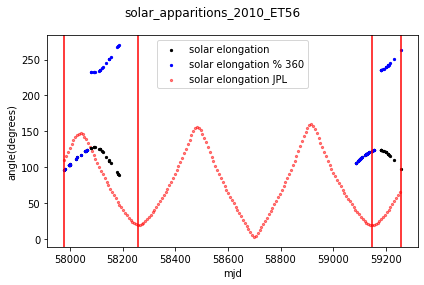

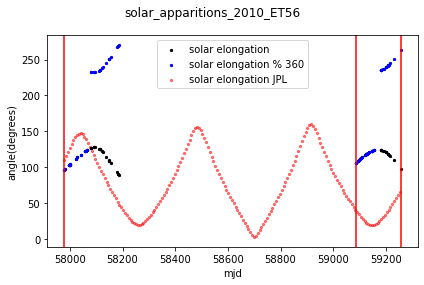

[57978.6319303 58258.        59147.        59256.259861 ]
[57978.6319303 59084.548403  59256.259861 ]
3 2
1 2004 MA7 4.36971508338303
2.67281406
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2004_MA7.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2004_MA7.csv
load data
18.908983196210432
0.156
load Horizons
synodic period = 473.31776306546305
[57816.57522   58006.3096169]


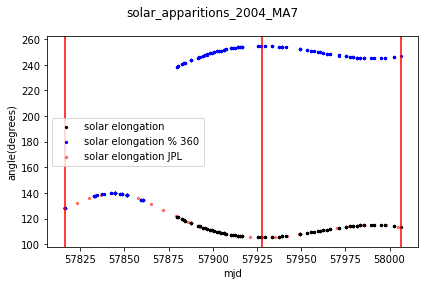

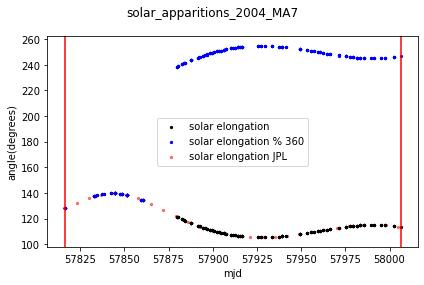

[57816.57522   57928.        58006.3096169]
[57816.57522   58006.3096169]
2 1
2 2010 NW1 6.260595289030687
3.39685561
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_NW1.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_NW1.csv
load data
18.50256936634858
0.114
load Horizons
synodic period = 434.38378262268003
[57512.4790229 57639.3553255]


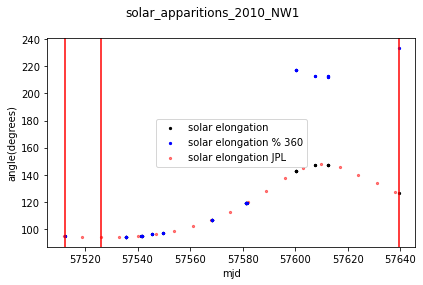

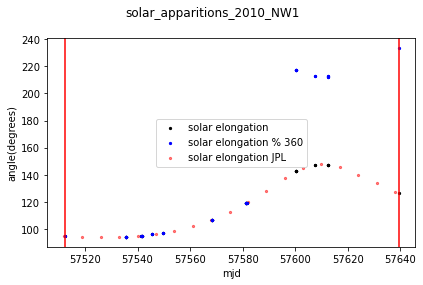

[57512.4790229 57526.        57639.3553255]
[57512.4790229 57639.3553255]
2 1
3 2010 AA108 7.515279885446844
3.83674945
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_AA108.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_AA108.csv
load data
11.841835819809145
0.04
load Horizons
synodic period = 421.0221519900164
[57415.385544  57832.432442  58255.4216283 58659.462002  58674.451551 ]


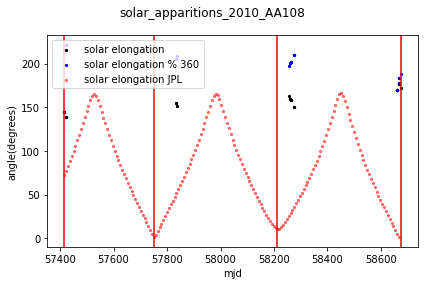

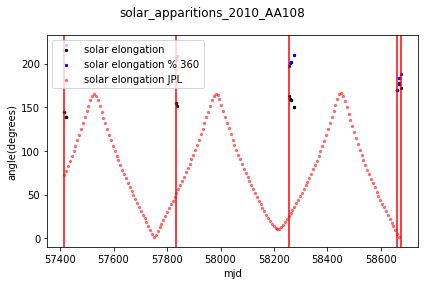

[57415.385544 57751.       58213.       58674.451551]
[57415.385544  57832.432442  58255.4216283 58659.462002  58674.451551 ]
3 4
4 2010 LK60 7.424675790804764
3.80584996
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_LK60.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_LK60.csv
load data
12.777132710129699
0.089
load Horizons
synodic period = 421.8122052979548
[57756.601515   58223.46910655 58279.3602217 ]


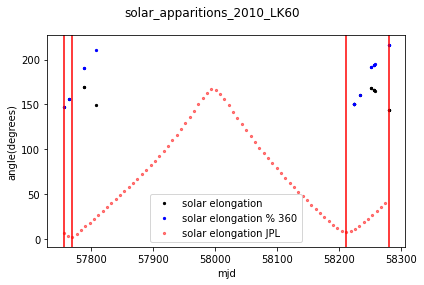

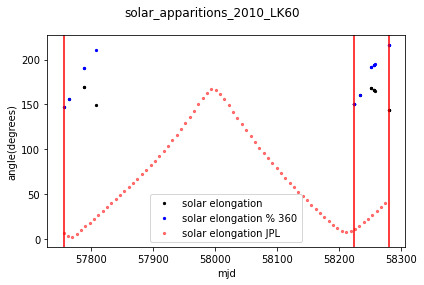

[57756.601515  57770.        58211.        58279.3602217]
[57756.601515   58223.46910655 58279.3602217 ]
3 2
5 2010 MF86 7.571146419396356
3.8557402
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_MF86.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_MF86.csv
load data
13.93813289637494
0.077
load Horizons
synodic period = 420.54586318798385
[57942.4331286  58406.58285435 58452.45991905]


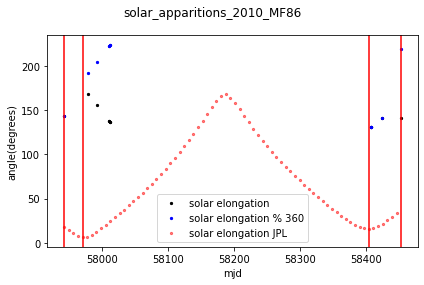

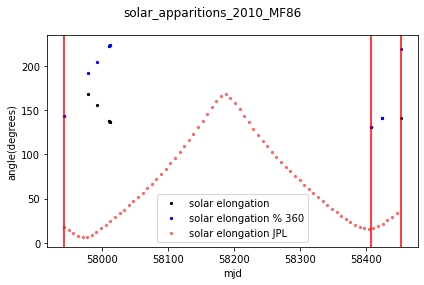

[57942.4331286  57970.         58404.         58452.45991905]
[57942.4331286  58406.58285435 58452.45991905]
3 2
6 2010 FL77 8.994715239869947
4.32505478
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_FL77.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_FL77.csv
load data
11.61295826489471
0.0275
load Horizons
synodic period = 410.6551595708789
[58620.435648 58711.397928]


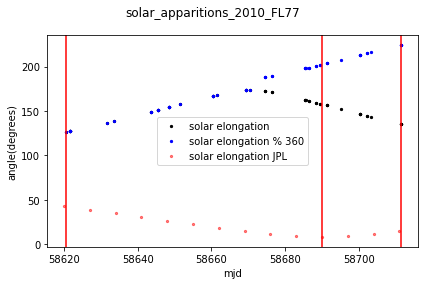

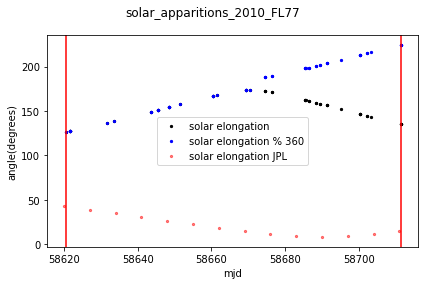

[58620.435648 58690.       58711.397928]
[58620.435648 58711.397928]
2 1
7 2010 KU49 9.110649114526915
4.36213947
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_KU49.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_KU49.csv
load data
13.678530394766309
0.128
load Horizons
synodic period = 410.0025632777346
[57499.495301  57956.5957316 57999.5208991]


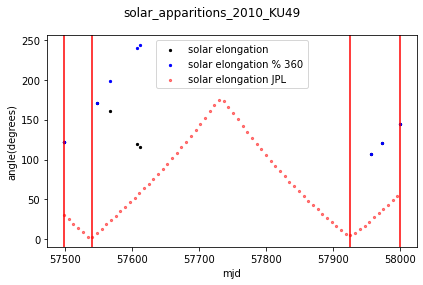

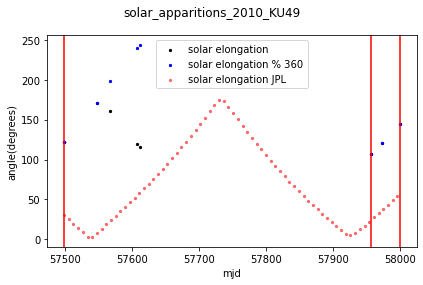

[57499.495301  57541.        57926.        57999.5208991]
[57499.495301  57956.5957316 57999.5208991]
3 2
8 2010 BR88 10.395969187320539
4.76332253
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/results_analysis/obs/df_data_2010_BR88.csv
/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/solar_apparitions_files/df_eph_2010_BR88.csv
load data
14.280300092123266
0.076
load Horizons
synodic period = 403.846444972654
[57398.286458  57802.4166765 58223.538785  58743.498206  58932.261343 ]


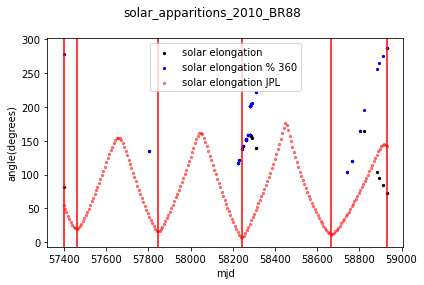

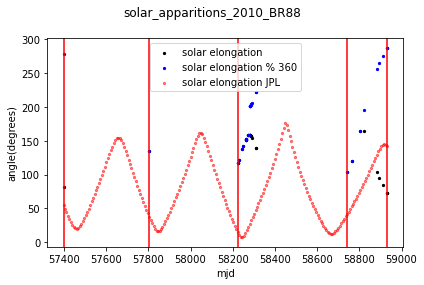

[57398.286458 57461.       57846.       58245.       58665.
 58932.261343]
[57398.286458  57802.4166765 58223.538785  58743.498206  58932.261343 ]
5 4


In [48]:
_df = df_results2[(df_results2["N_app_diff"]!=df_results2["N_app_JPL"]) &
           (df_results2["q_perihelion"]>1.3)]

for i in range(len(_df)):
    
    name = _df.iloc[i]["name"]
    period = (_df.iloc[i]["a_semimajor_axis"]**1.5)

    print(i,name,period)
    print(_df.iloc[i]["a_semimajor_axis"])

    sol = sa.solar_apparitions(name=name,data_load_path=data_load_path,eph_load_path=eph_load_path)
    
    tp1 = sol.solar_elongation_JPL()
    tp2 = sol.solar_elongation(-1.0,period=period)

    sol.plot_solar_elongation(tp1)
    sol.plot_solar_elongation(tp2)

    print(tp1)
    print(tp2)
    print(len(tp1)-1,len(tp2)-1)

#     break

In [49]:
df_plot2 = df_results2[(df_results2["N_app_diff"]!=df_results2["N_app_JPL"])]

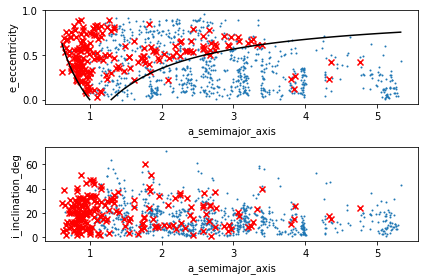

In [50]:
# plot orbital distribution
fig = plt.figure()
gs = gridspec.GridSpec(2, 1)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])

# ax1.scatter(df["a_semimajor_axis"],df["e_eccentricity"],s=1)
# ax2.scatter(df["a_semimajor_axis"],df["i_inclination_deg"],s=1)
ax1.scatter(df_samp["a_semimajor_axis"],df_samp["e_eccentricity"],s=1)
ax2.scatter(df_samp["a_semimajor_axis"],df_samp["i_inclination_deg"],s=1)

ax1.scatter(df_plot2["a_semimajor_axis"],df_plot2["e_eccentricity"],c="r",marker="x")
ax2.scatter(df_plot2["a_semimajor_axis"],df_plot2["i_inclination_deg"],c="r",marker="x")

q=1.3 # AU
x_grid=np.linspace(q,np.amax(df_samp["a_semimajor_axis"]))
ax1.plot(x_grid,1.0-(q/x_grid),color="k")
Q=1.0
x_grid2=np.linspace(np.amin(df_samp["a_semimajor_axis"]),Q)
ax1.plot(x_grid2,(Q/x_grid2)-1.0,color="k")

ax1.set_xlabel("a_semimajor_axis")
ax1.set_ylabel("e_eccentricity")

ax2.set_xlabel("a_semimajor_axis")
ax2.set_ylabel("i_inclination_deg")

plt.tight_layout()
plt.show()